/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Restarts: 1
BO Iterations: 2


Lengthscale Set As: None
Explore Bias: 0.0
Restart Number:  1


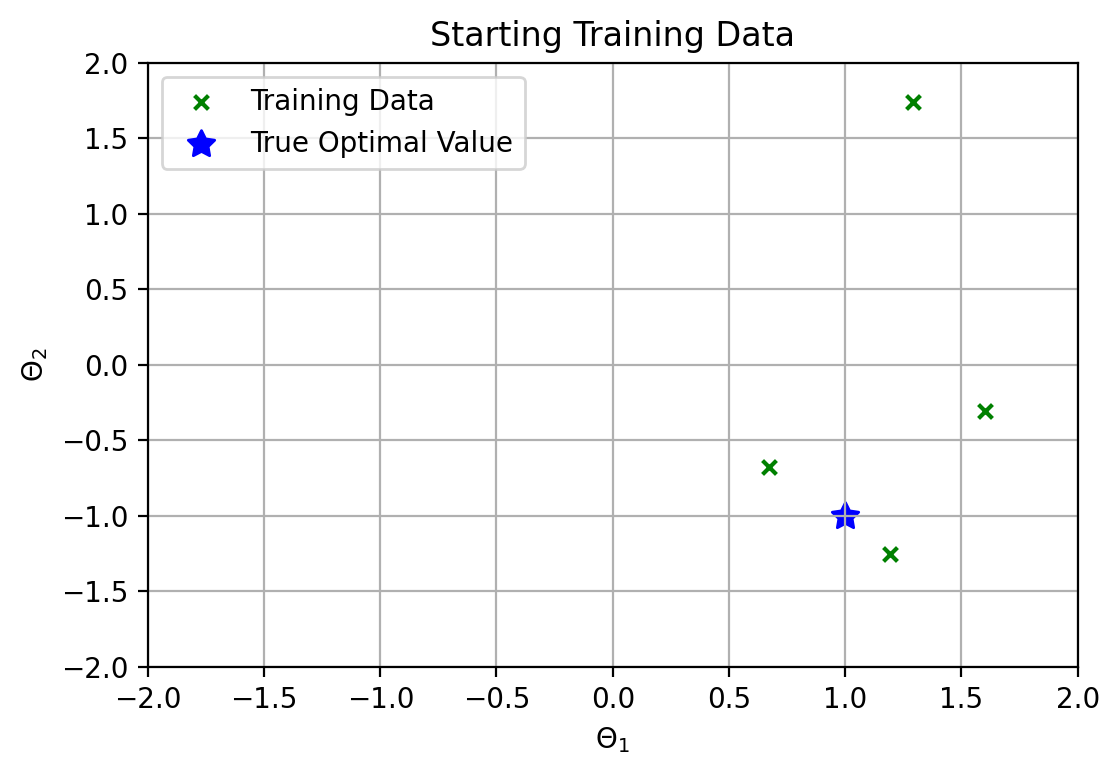

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/gpytorch/lazy/triangular_lazy_tensor.py:130: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  res = torch.triangular_solve(right_tensor, self.evaluate(), upper=self.upper).solution


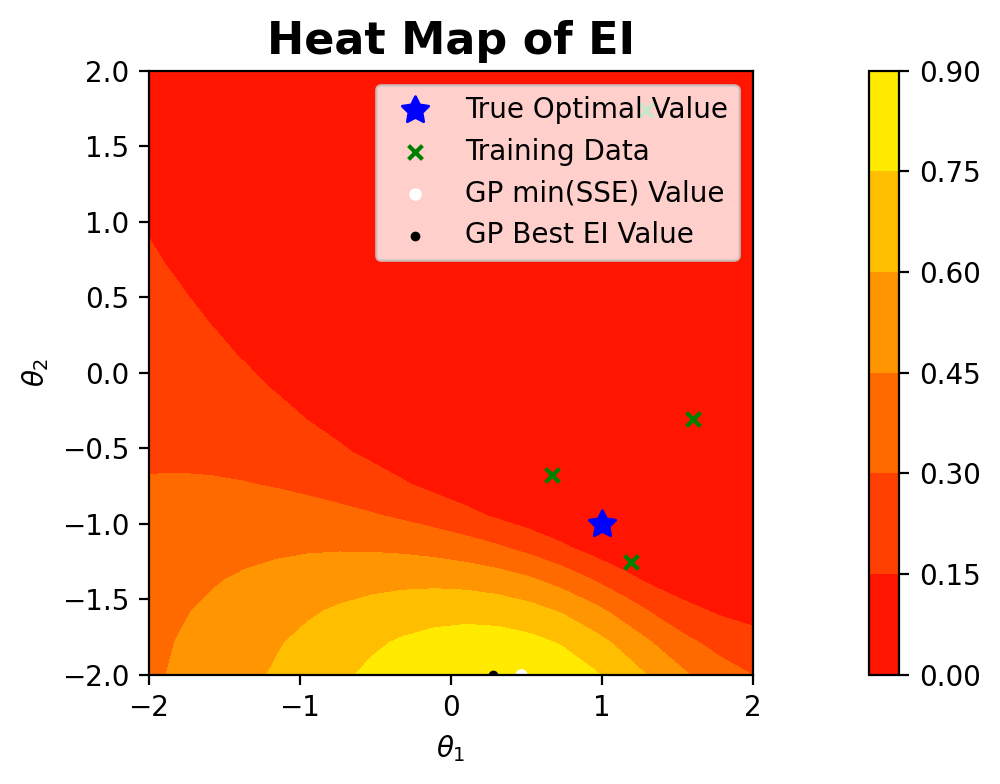

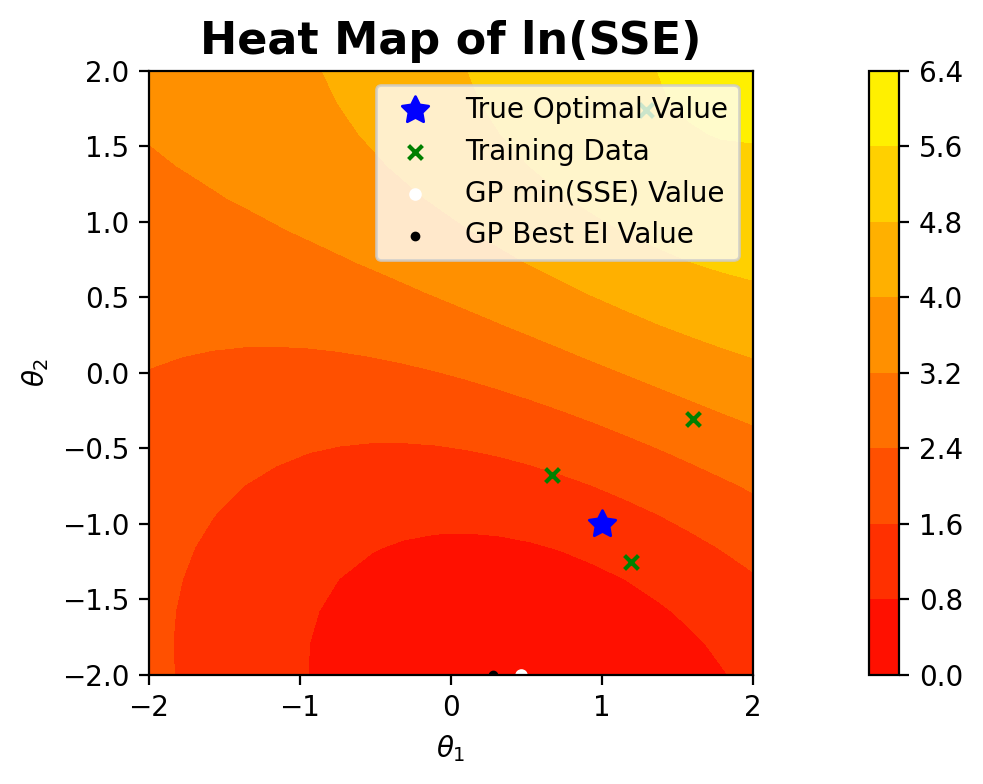

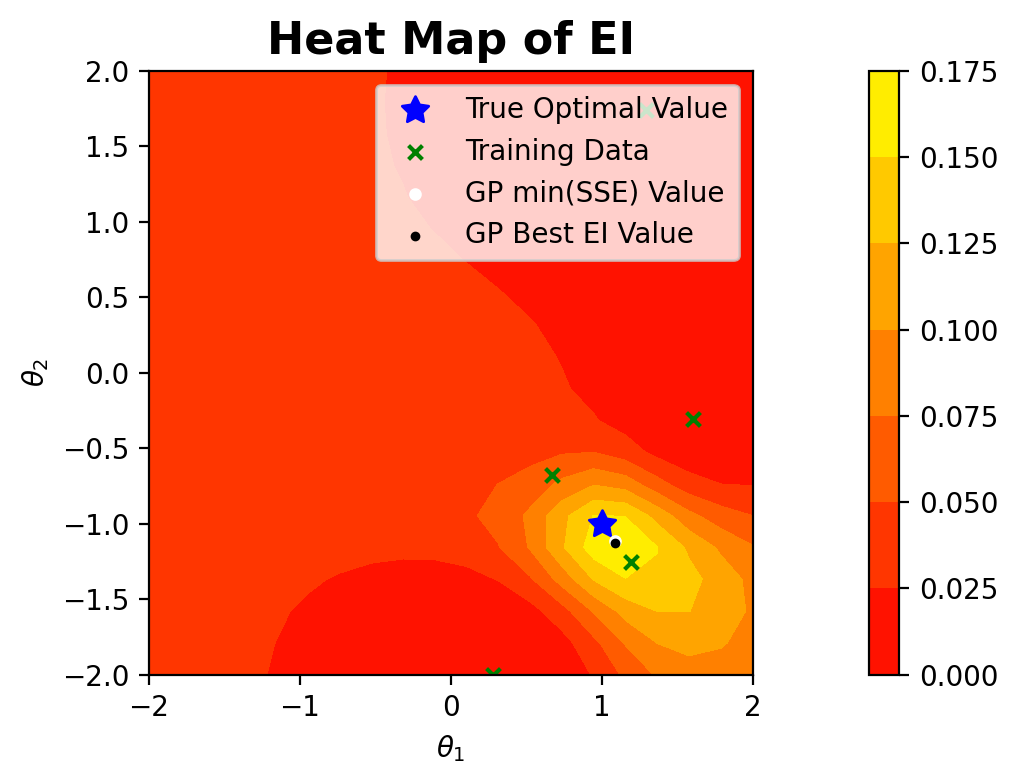

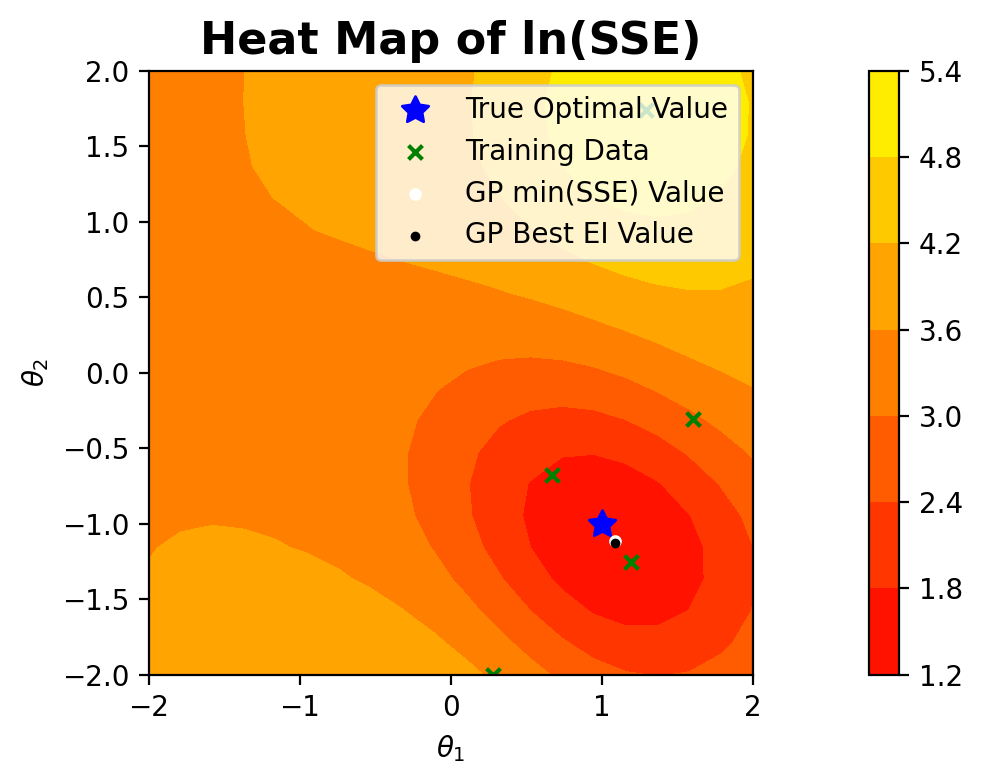

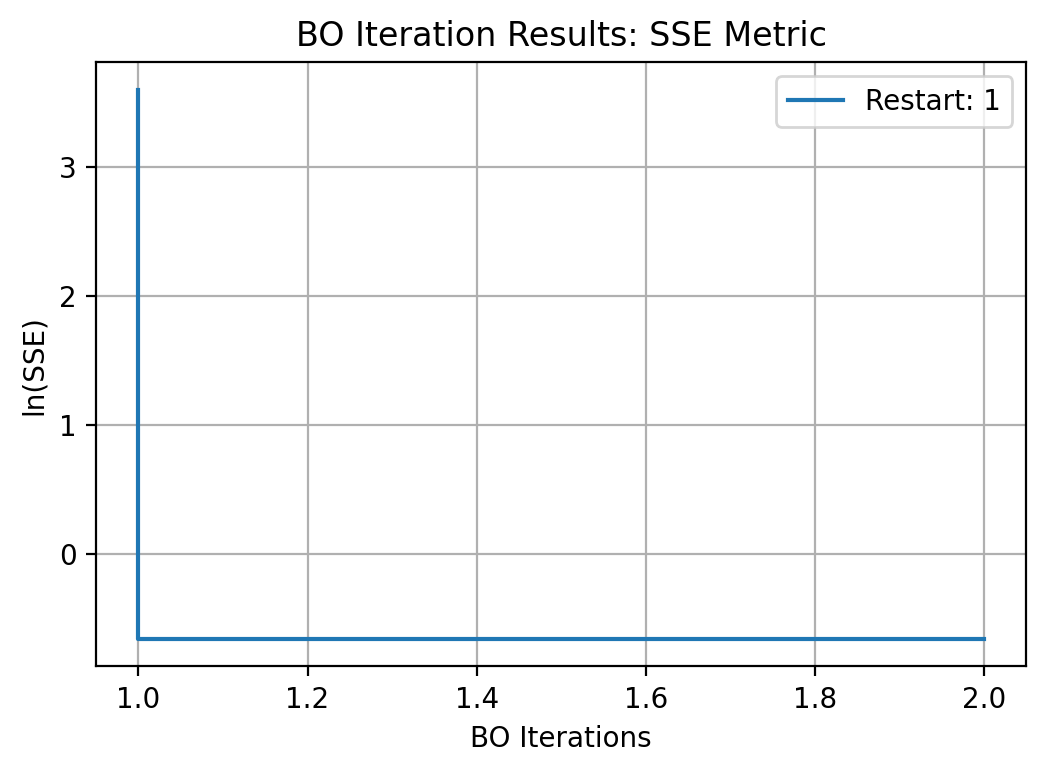

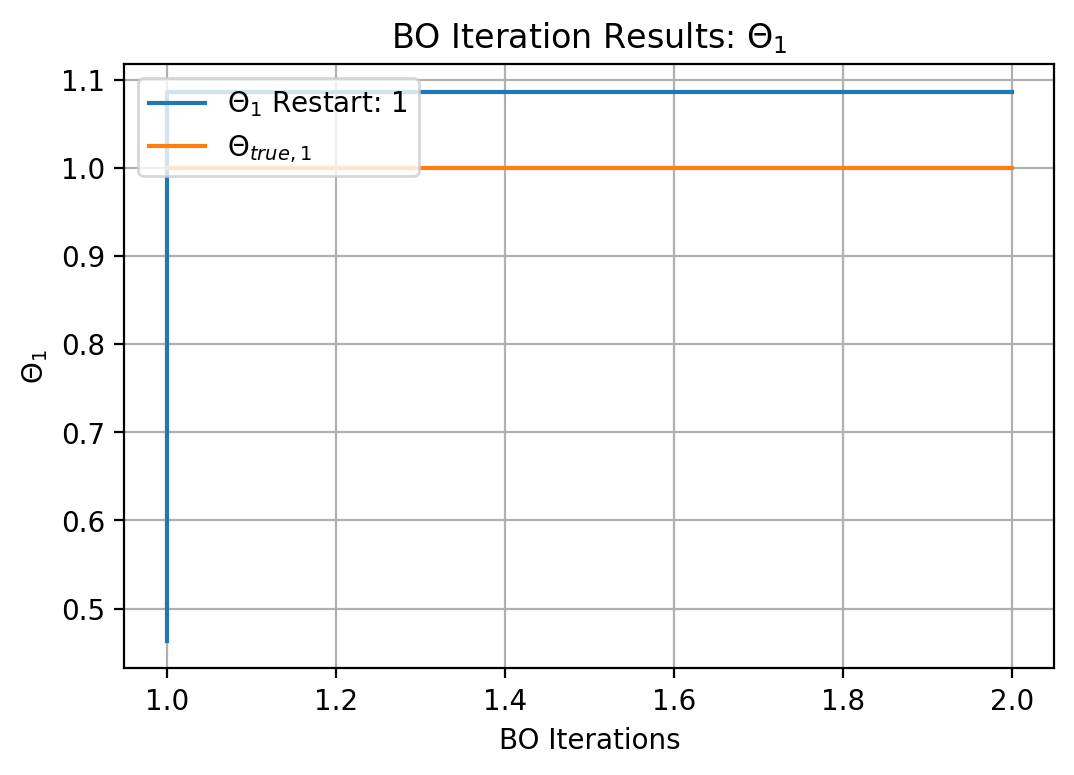

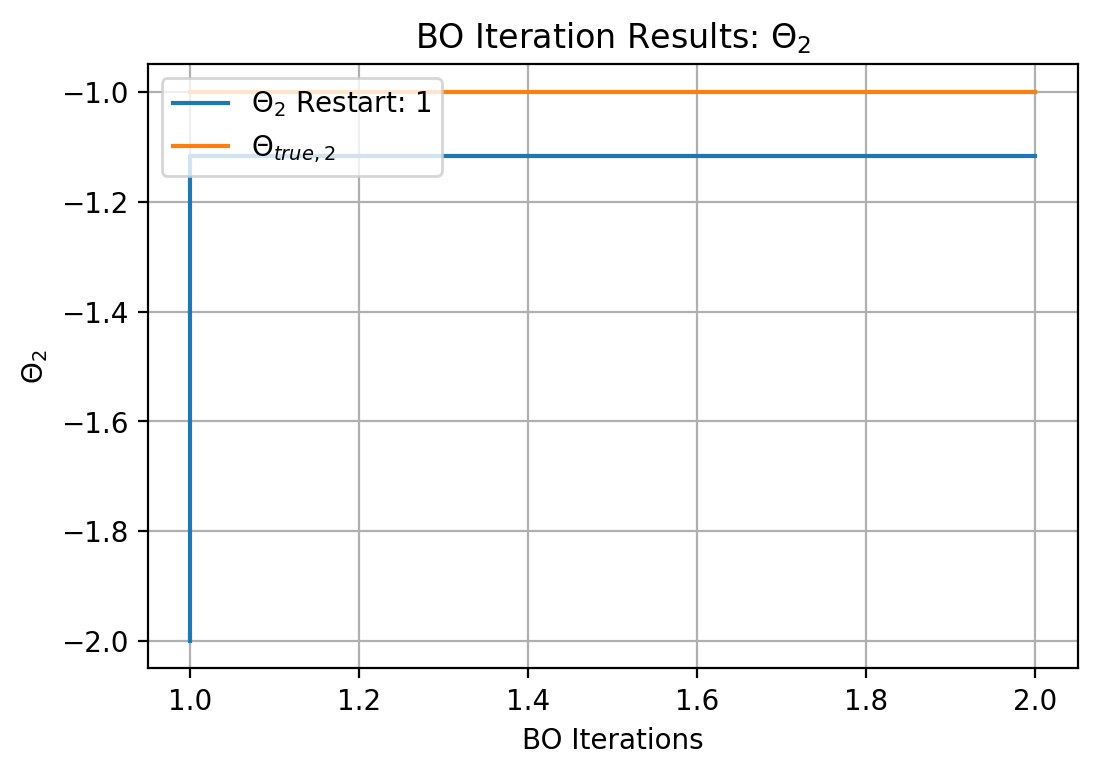

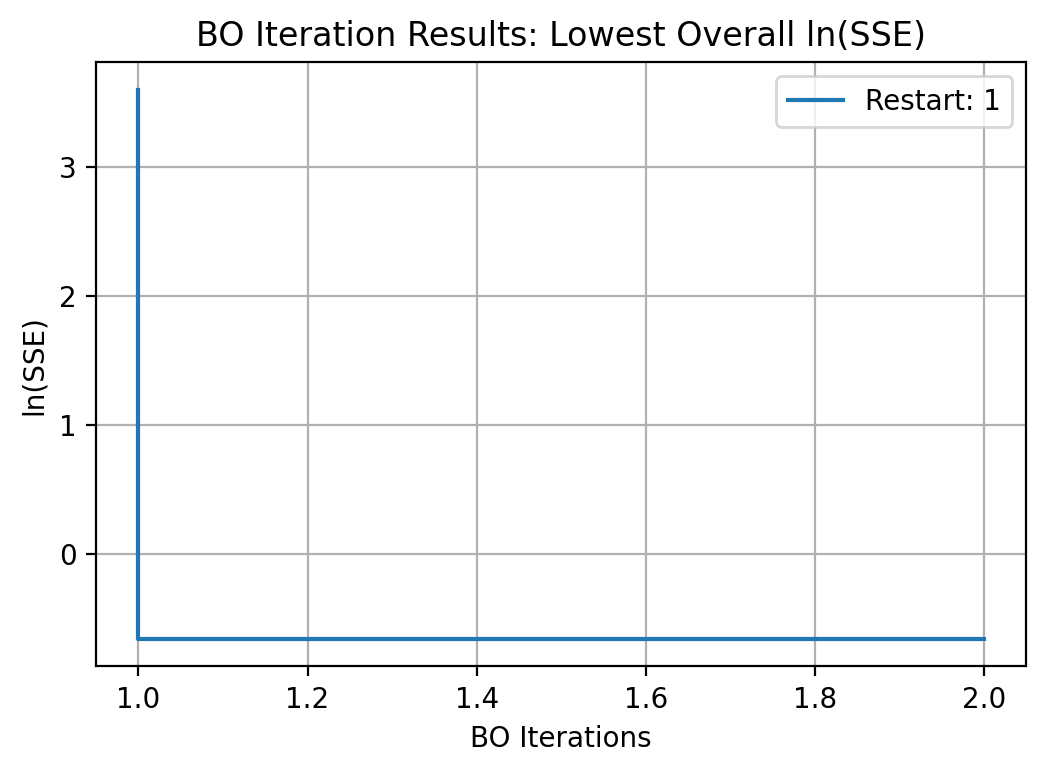

The GP predicts the lowest SSE of 5.171e-01 occurs at θ = [ 1.08633782 -1.11604357] during restart 1 at BO iteration 2
 

Lengthscale Set As: None
Explore Bias: 0.5
Restart Number:  1


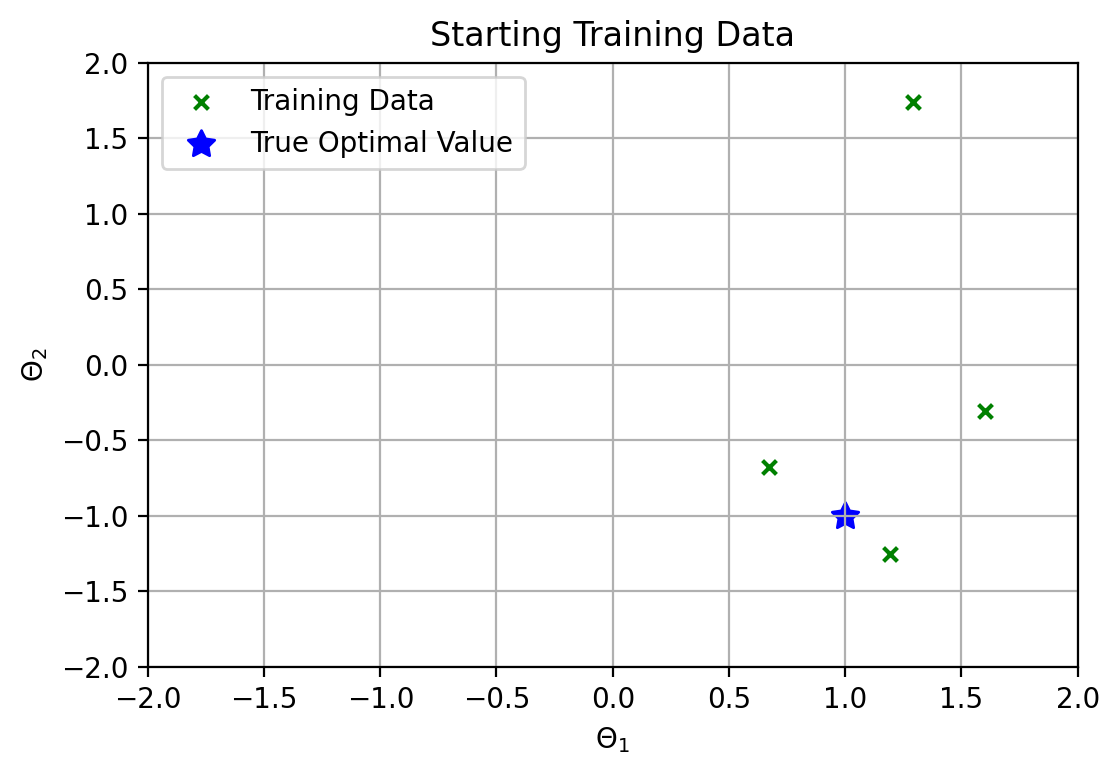

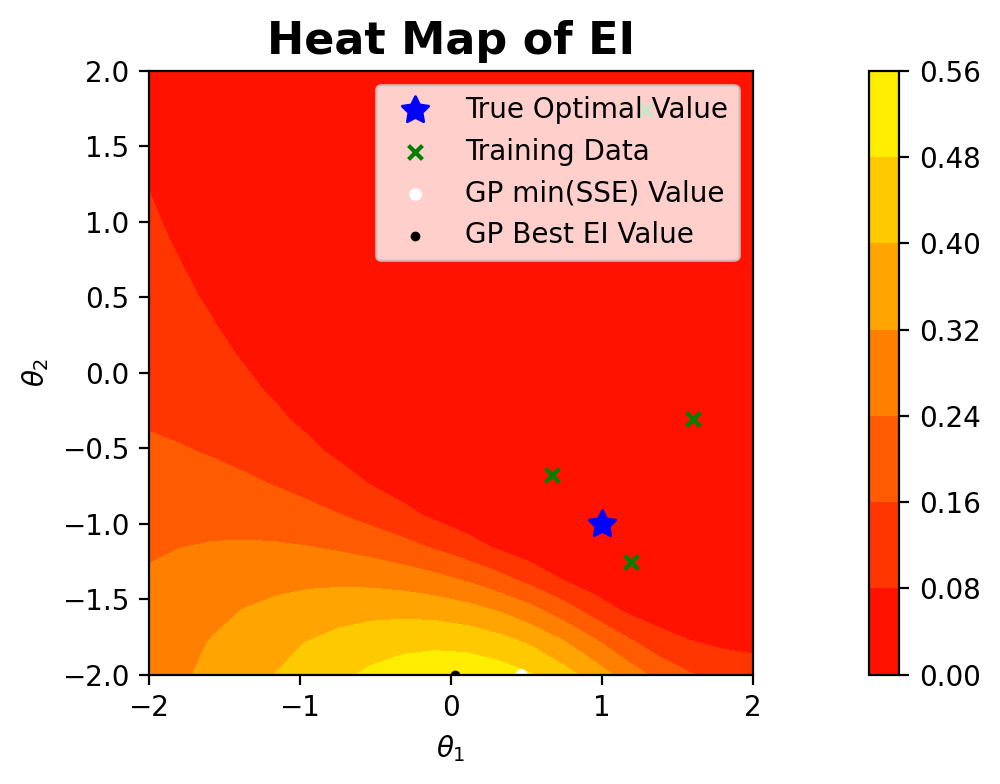

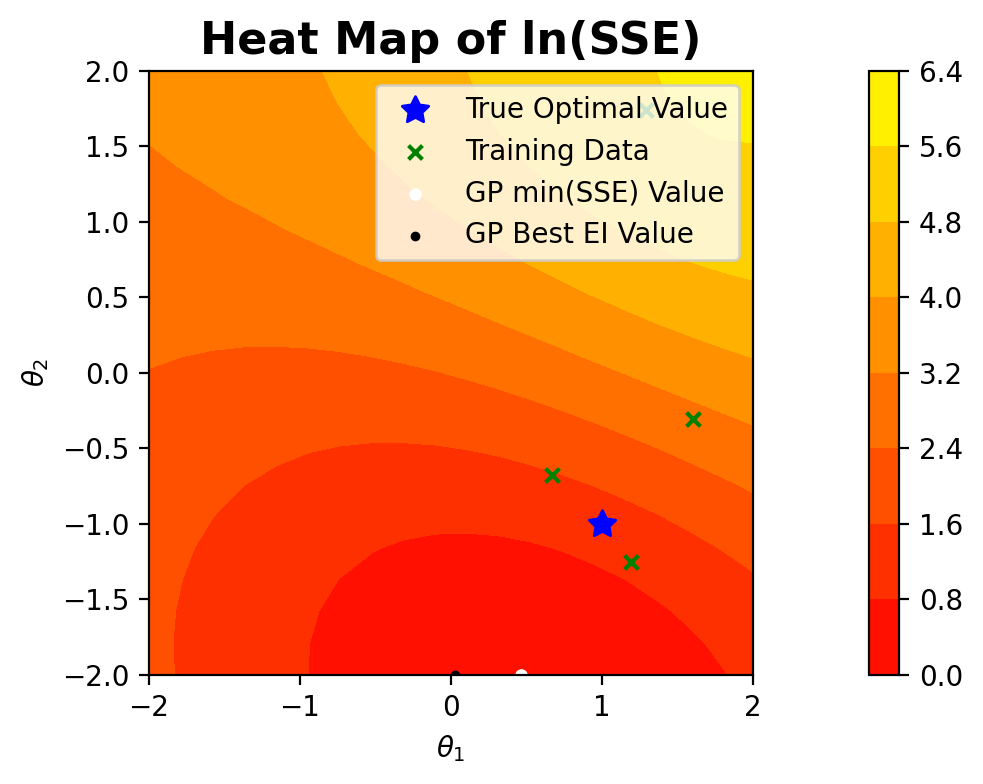

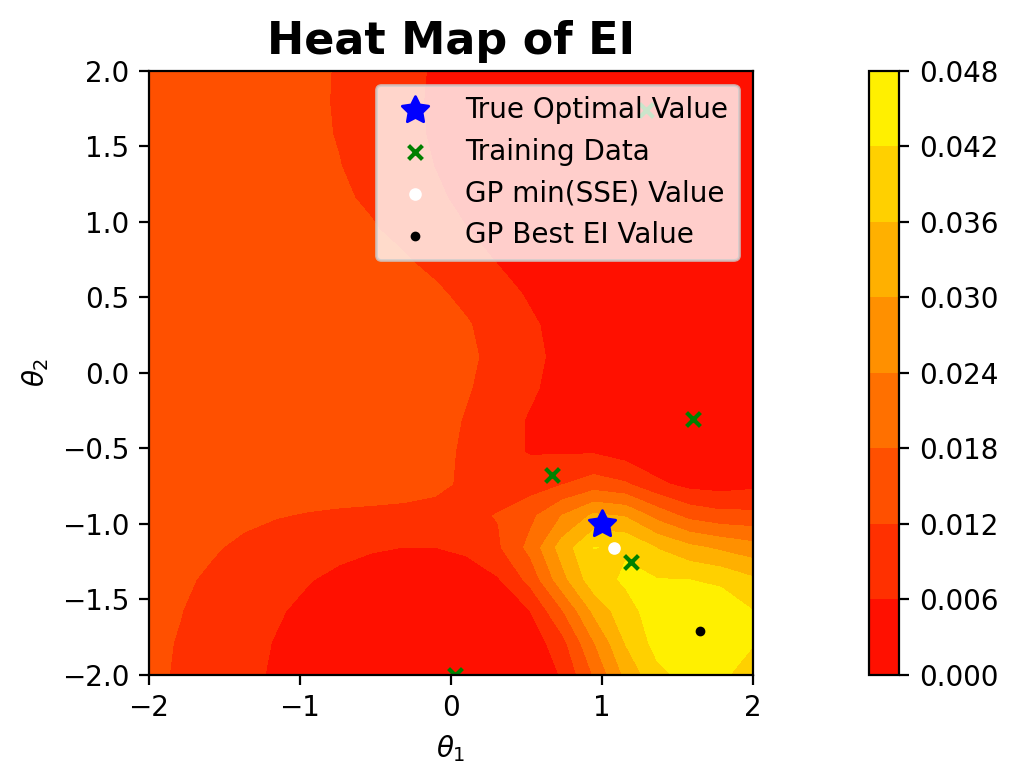

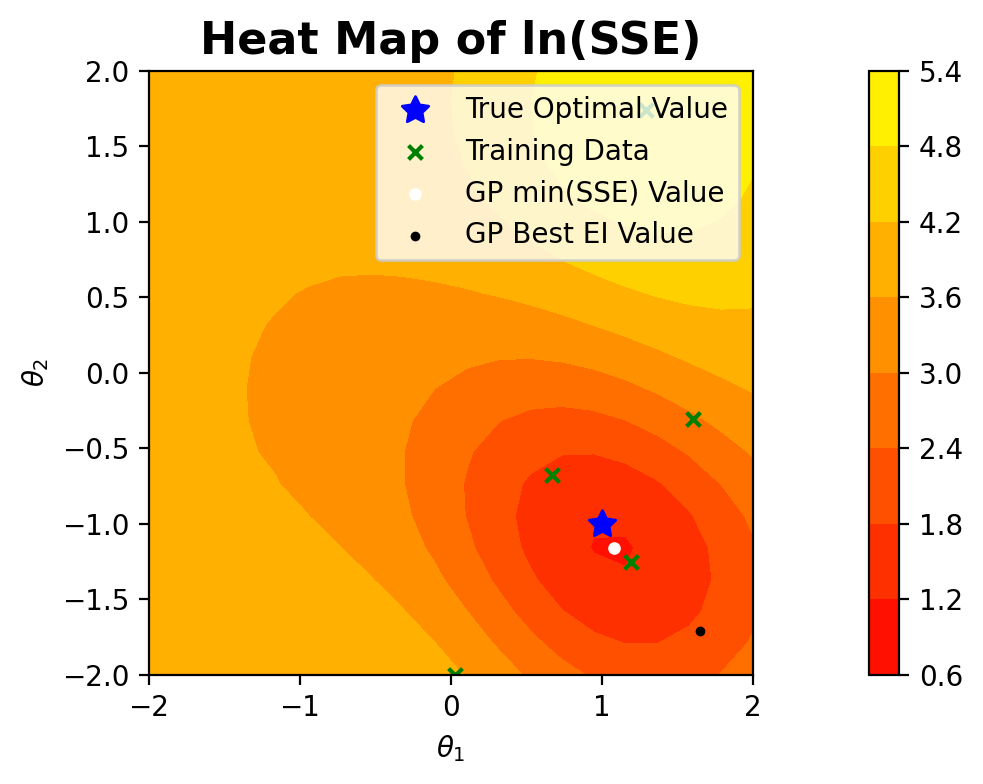

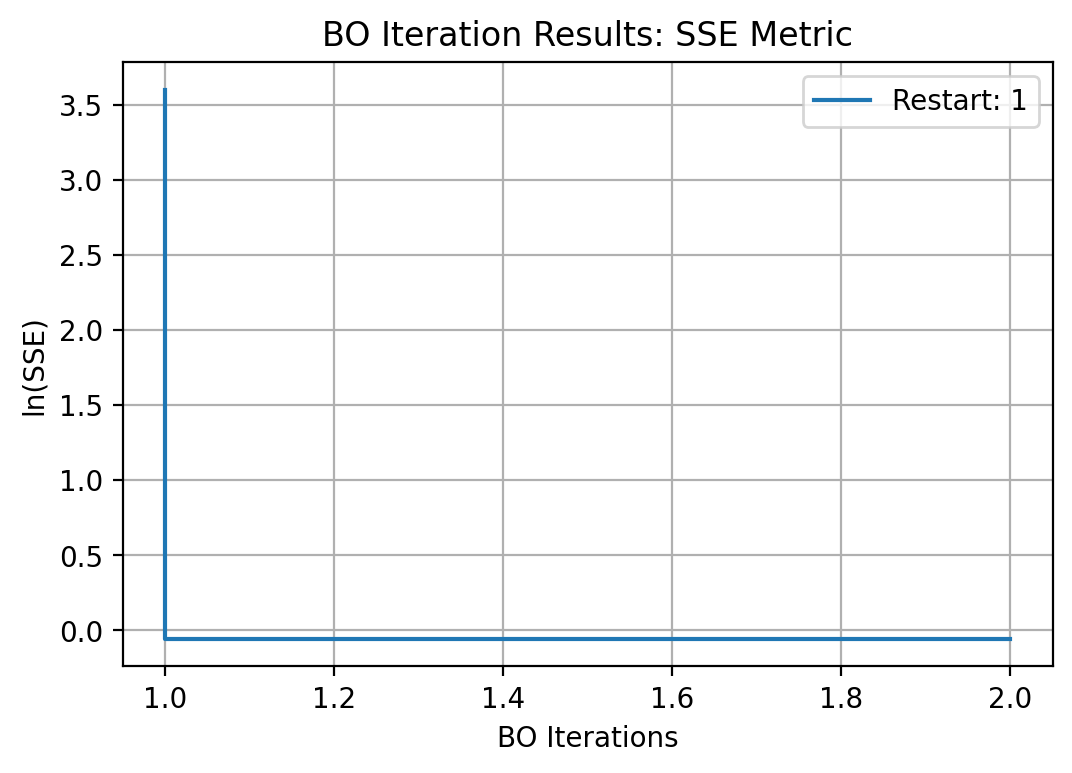

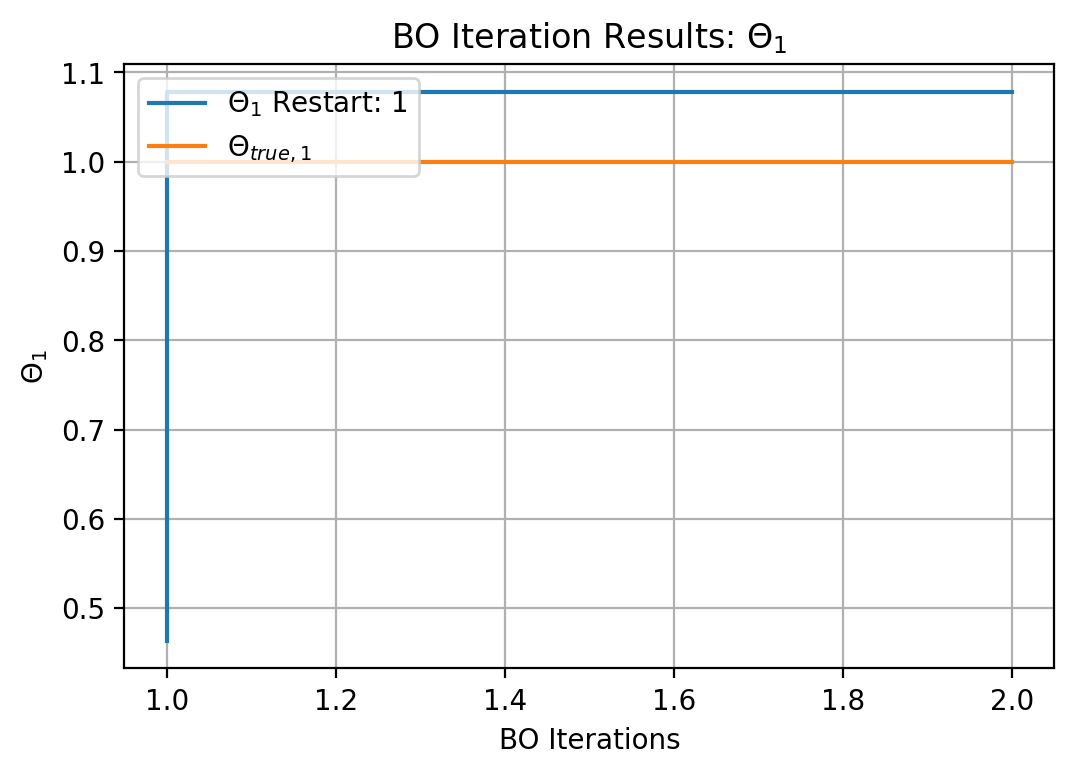

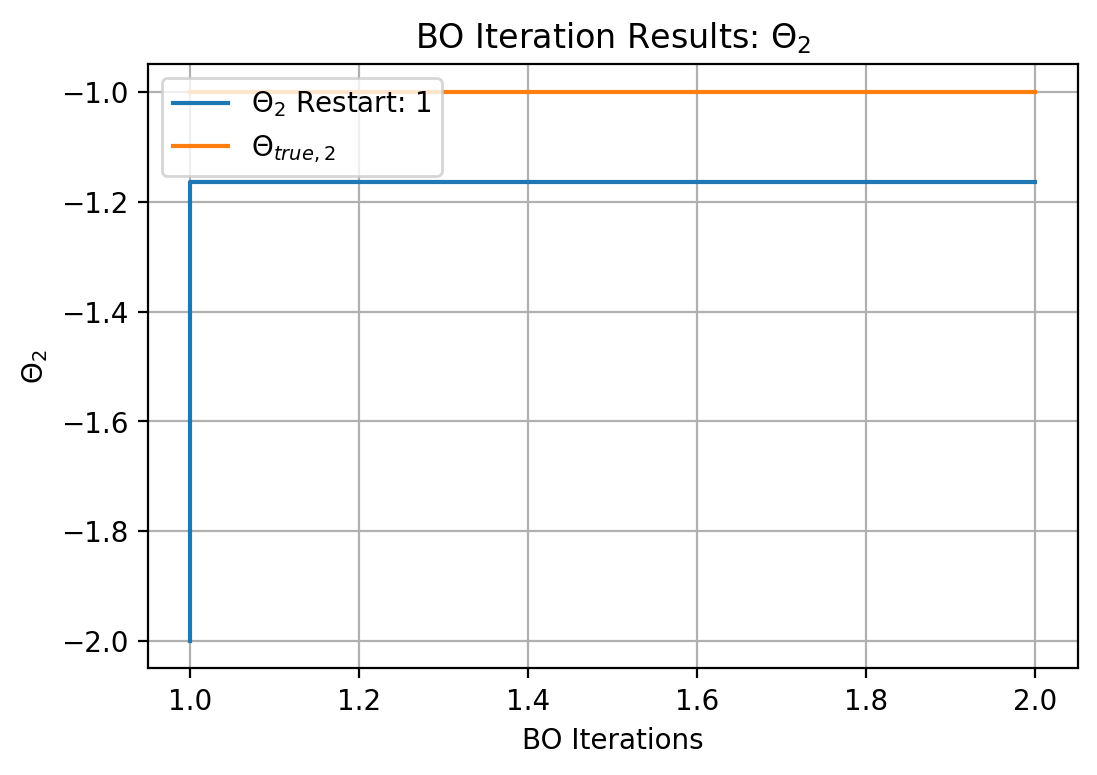

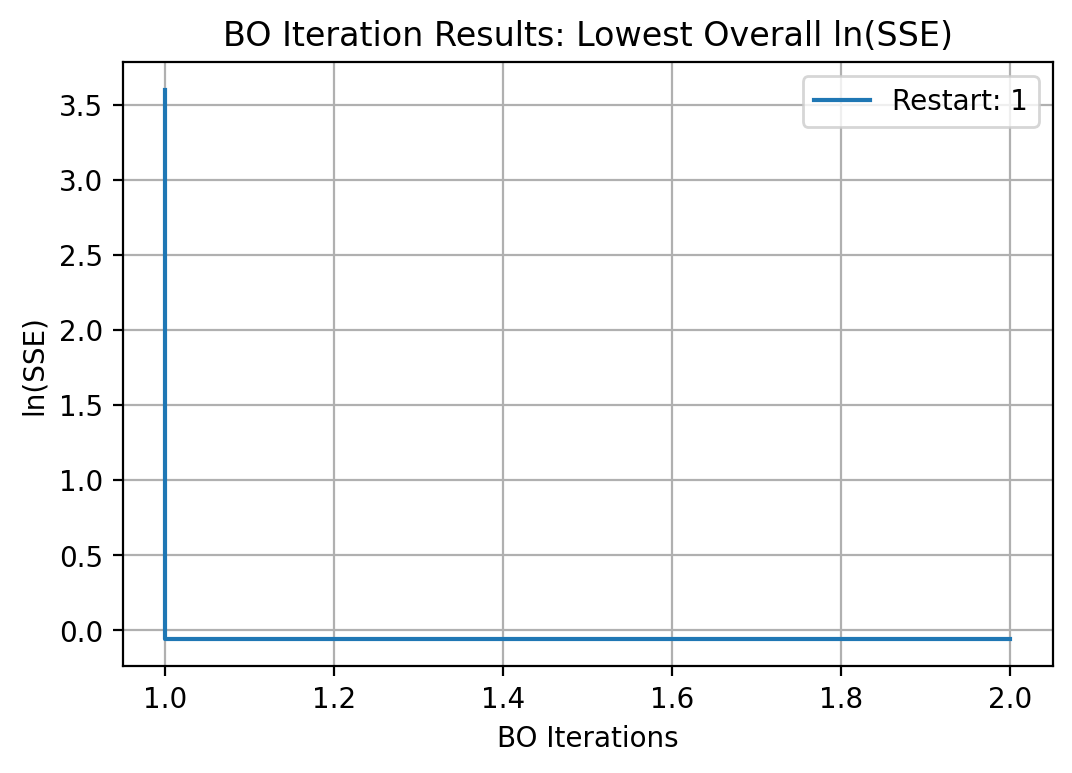

The GP predicts the lowest SSE of 9.441e-01 occurs at θ = [ 1.07812567 -1.16361201] during restart 1 at BO iteration 2
 

Lengthscale Set As: None
Explore Bias: 0.75
Restart Number:  1


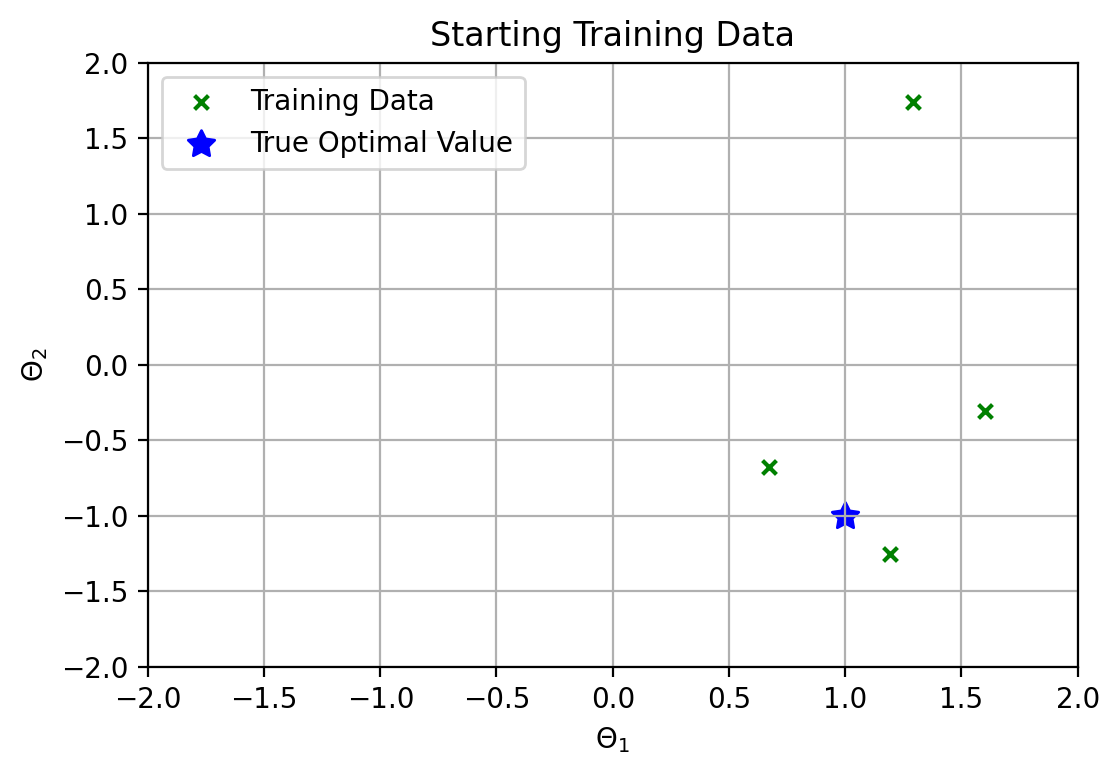

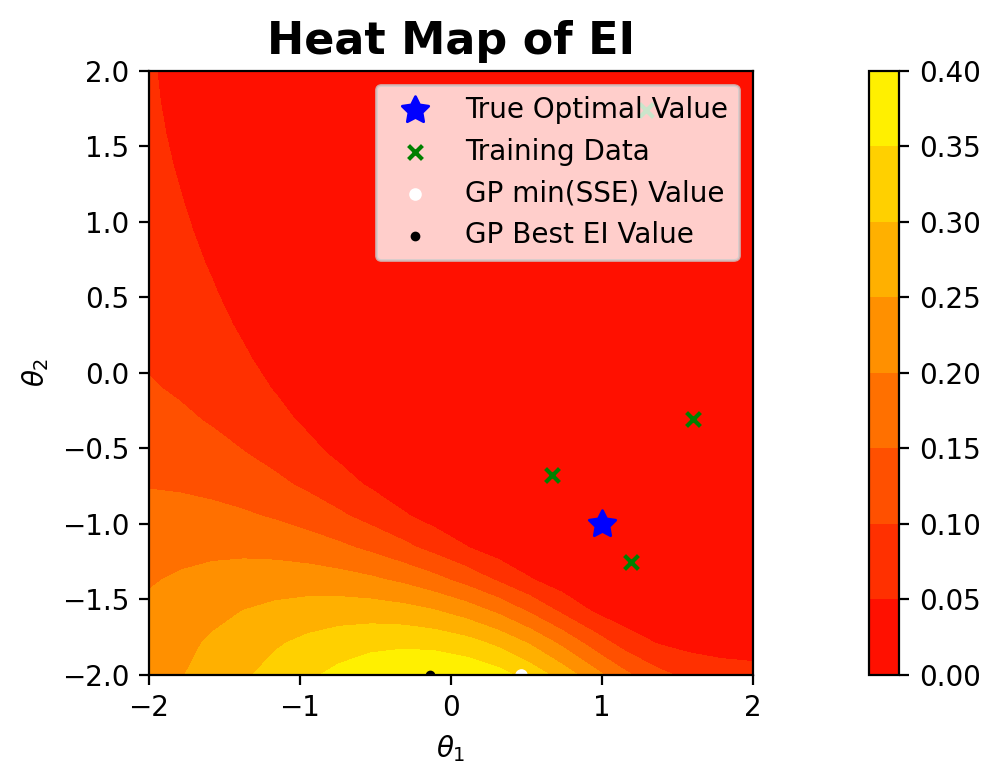

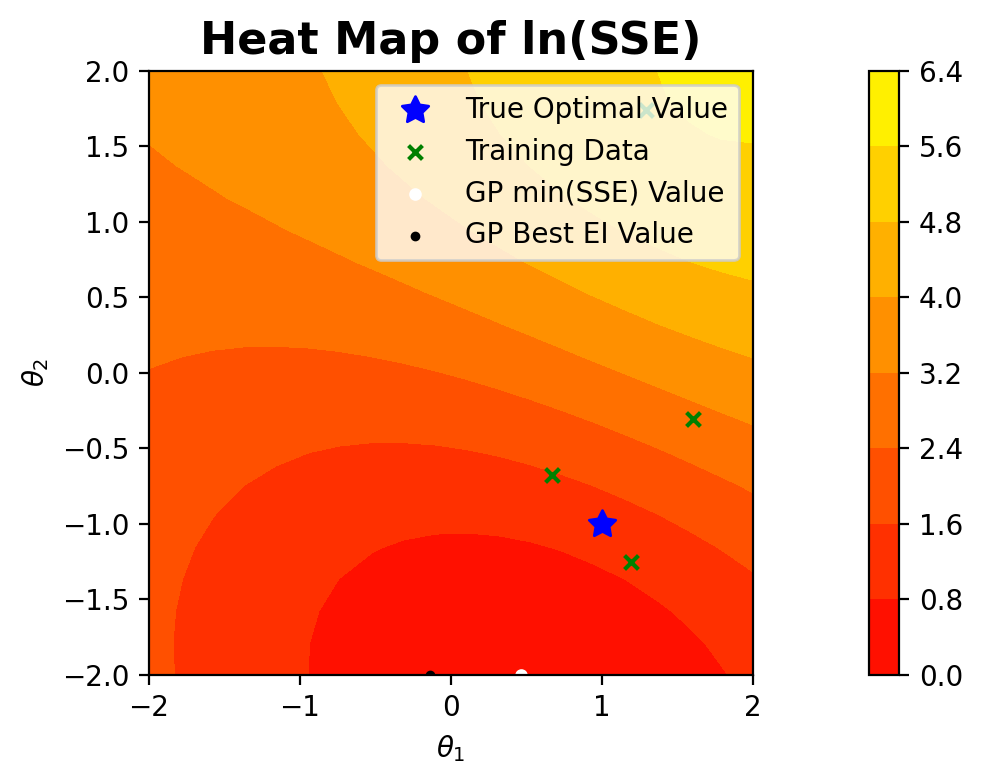

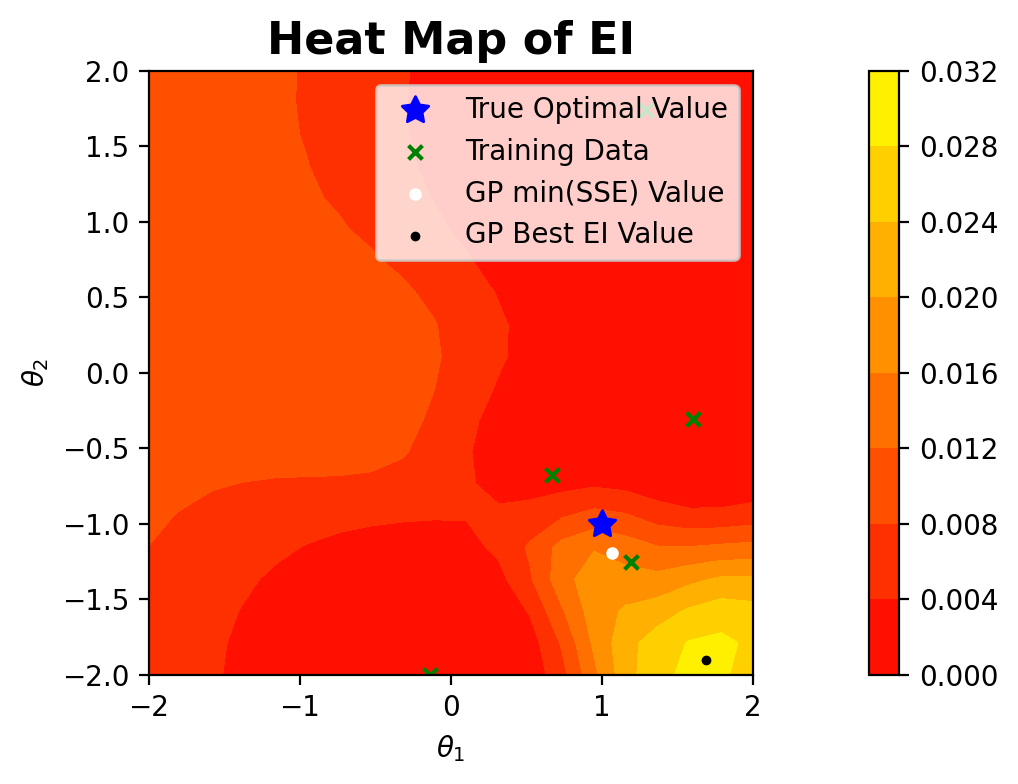

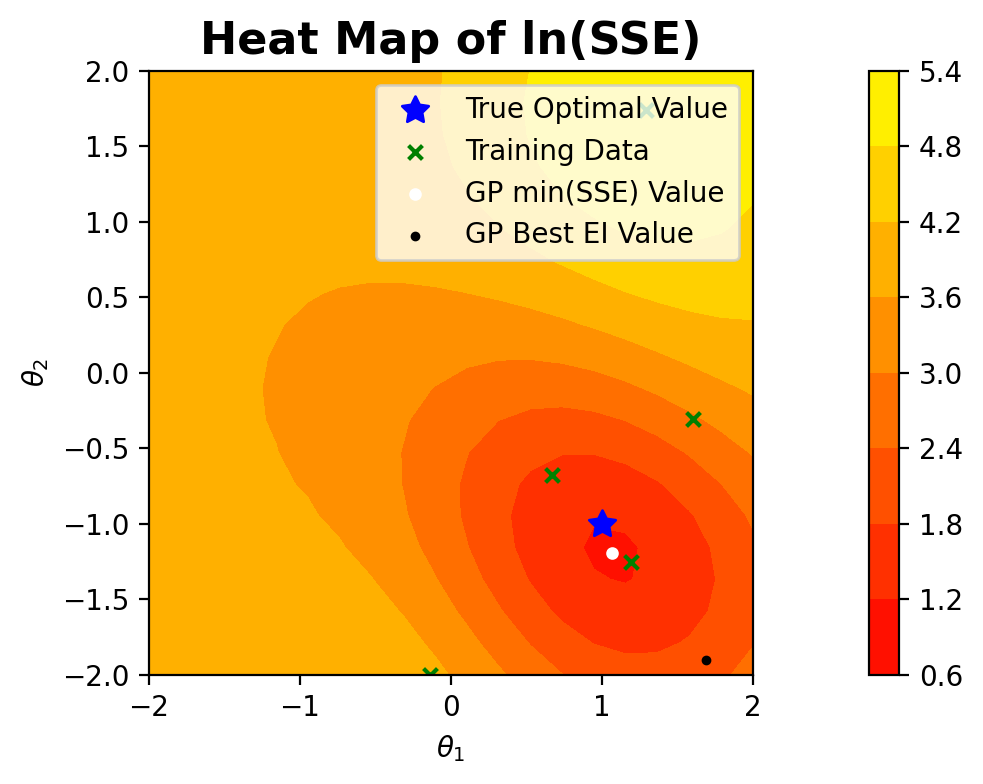

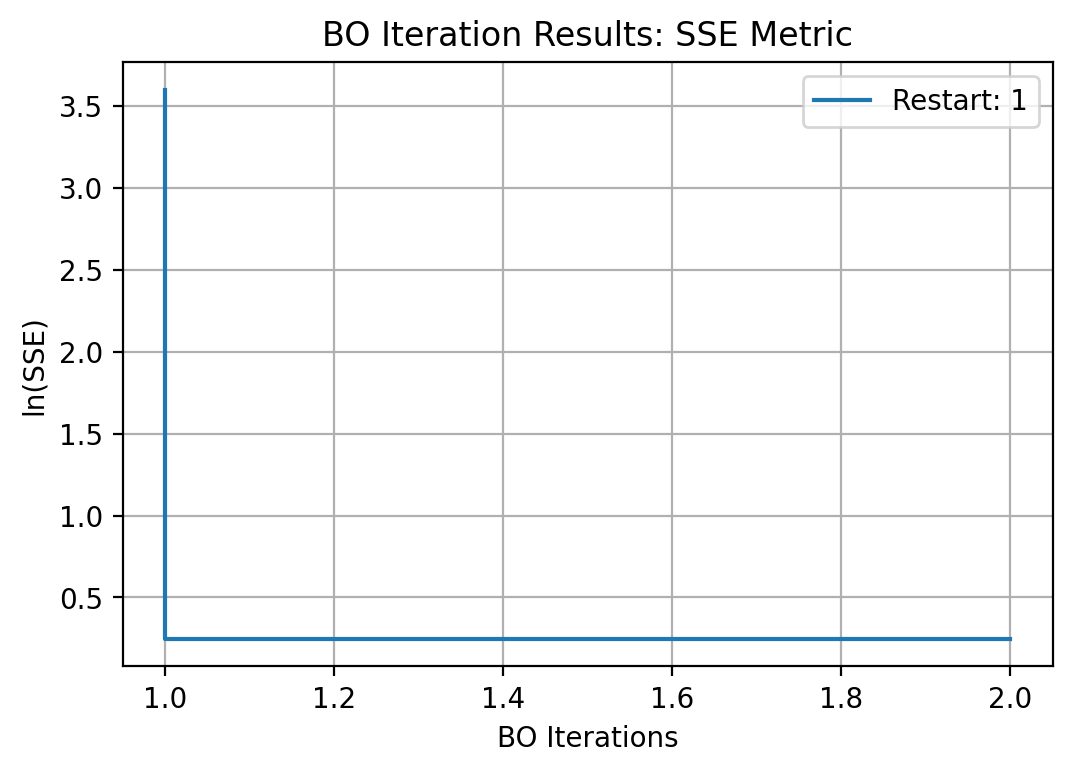

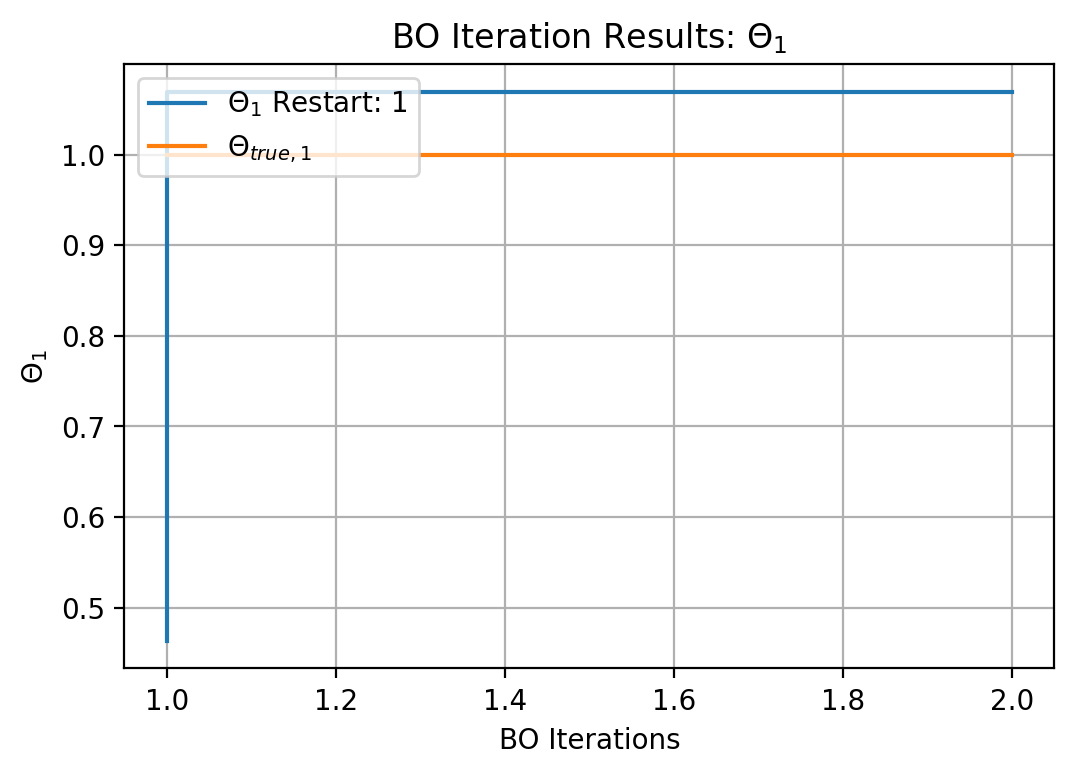

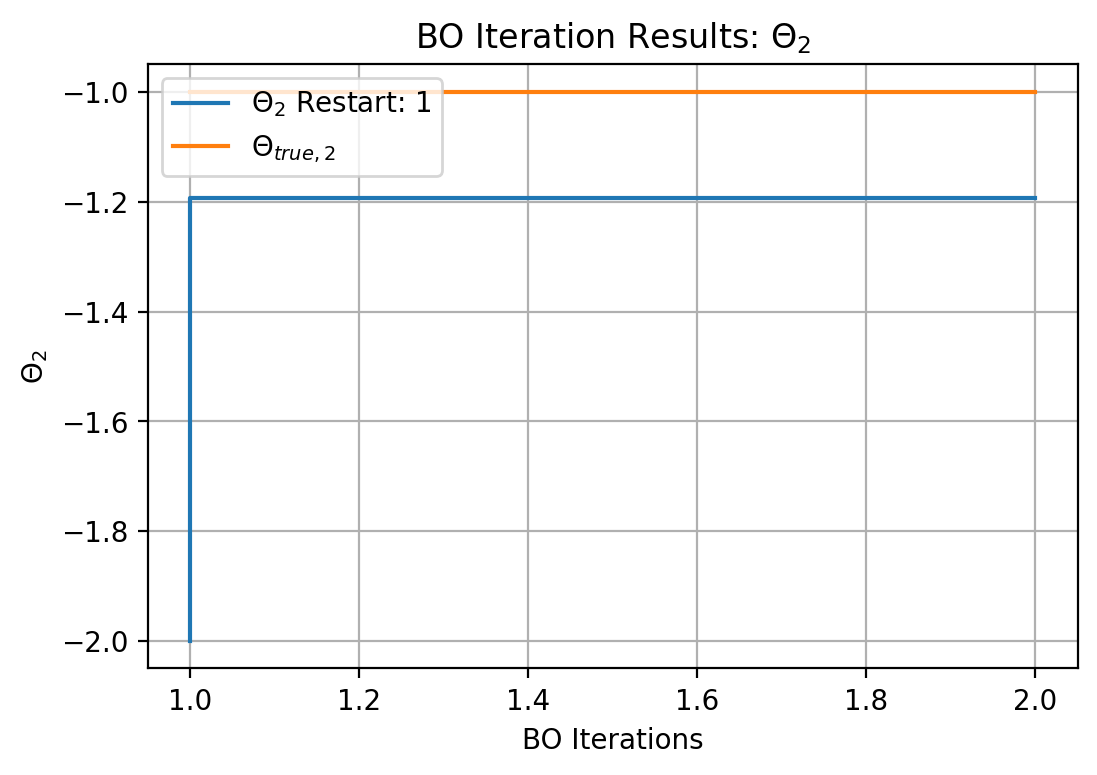

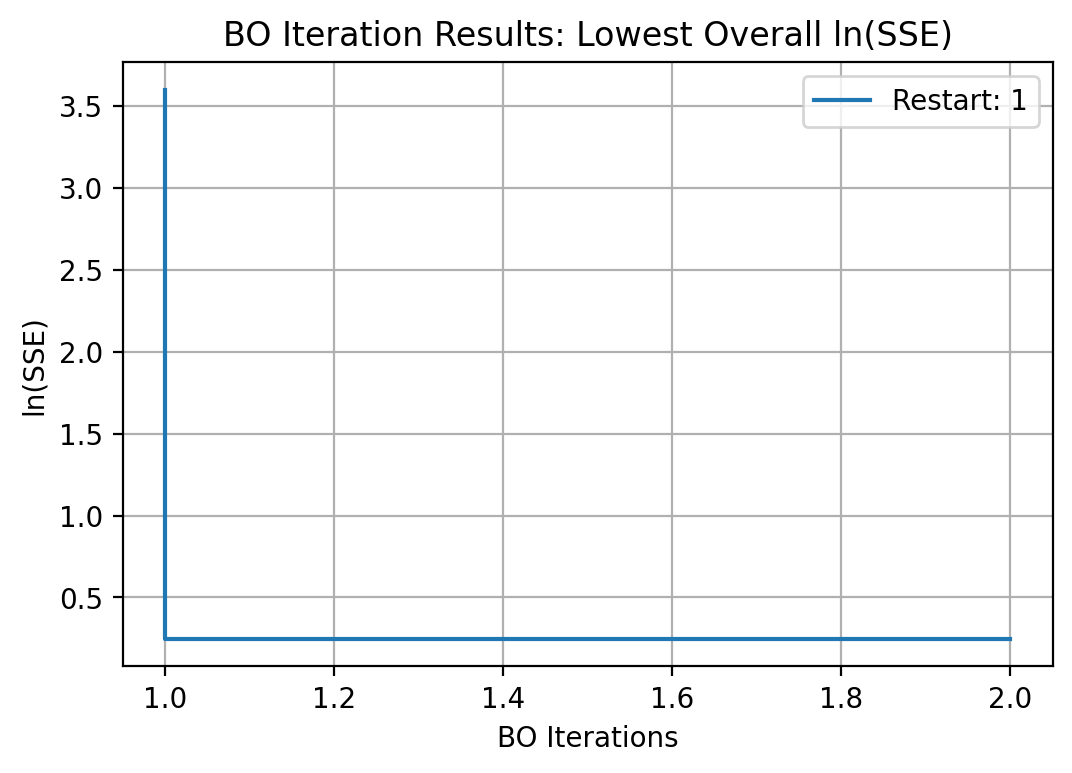

The GP predicts the lowest SSE of 1.280e+00 occurs at θ = [ 1.06925041 -1.19300227] during restart 1 at BO iteration 2
 

Lengthscale Set As: None
Explore Bias: 1.0
Restart Number:  1


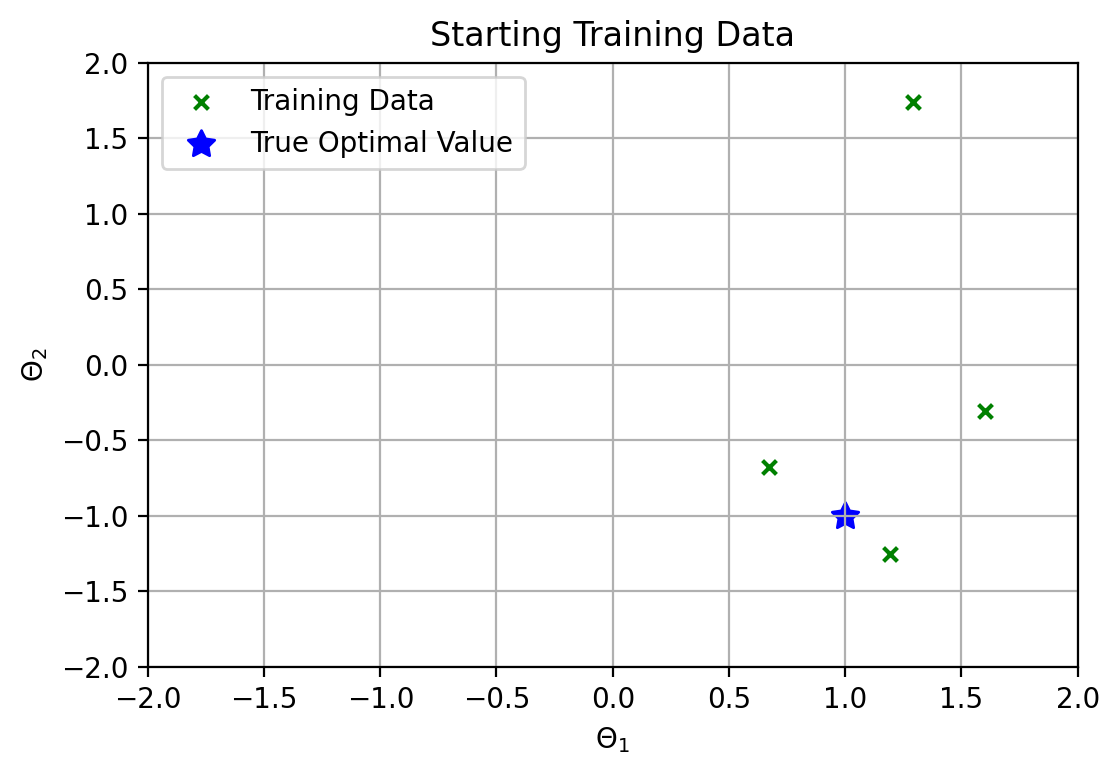

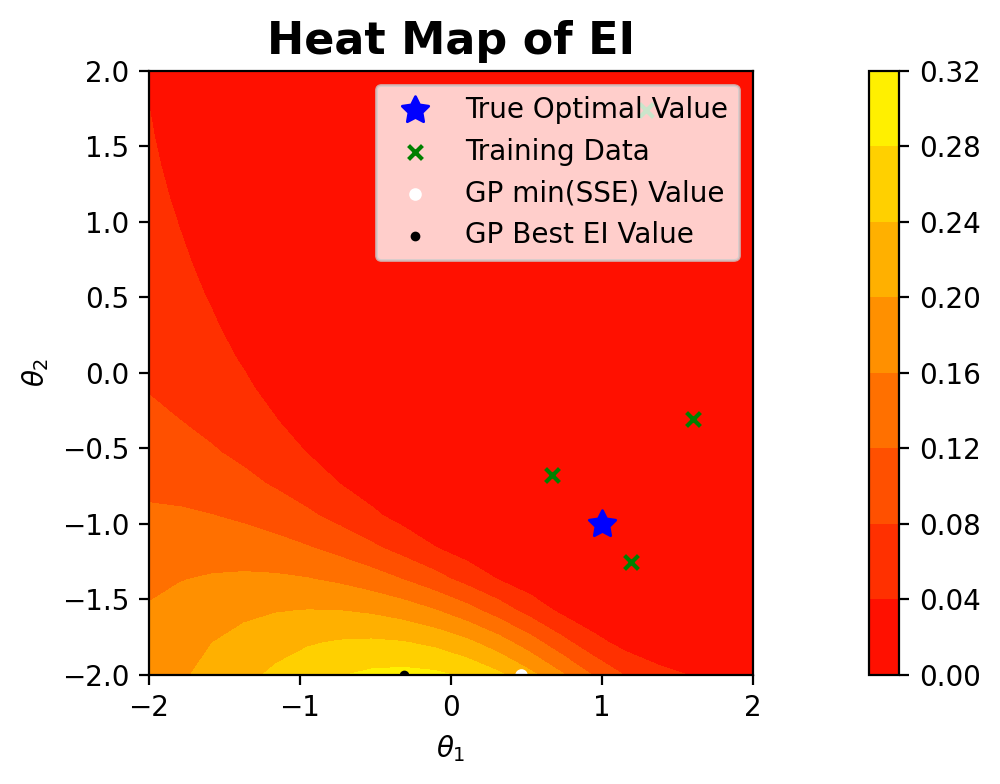

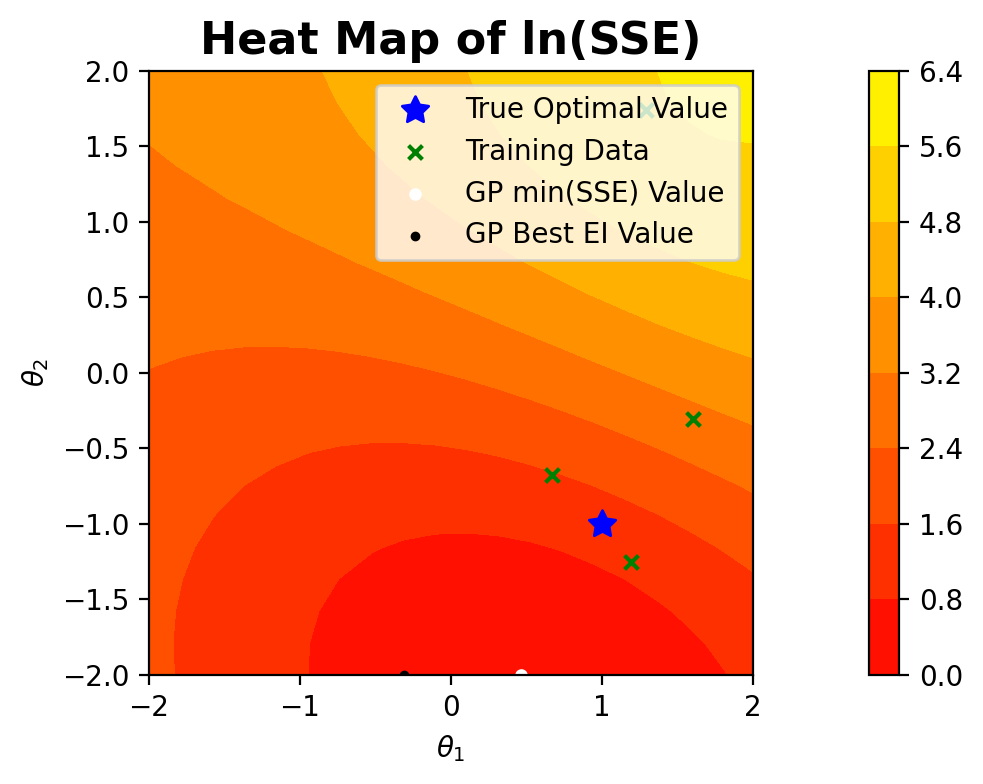

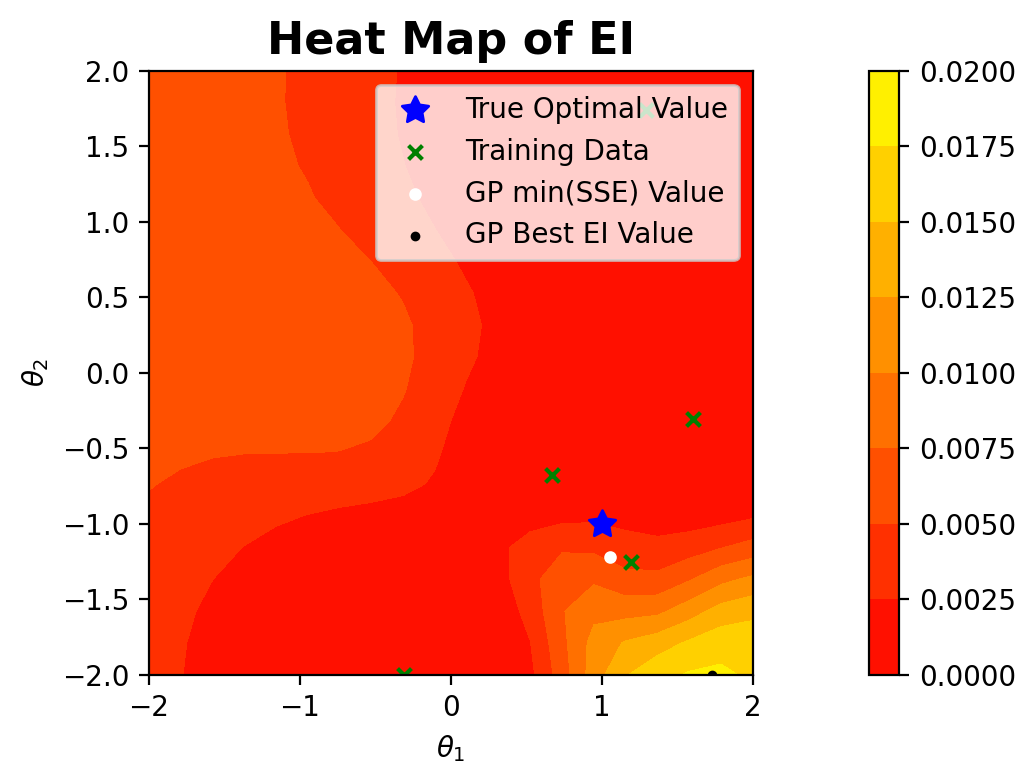

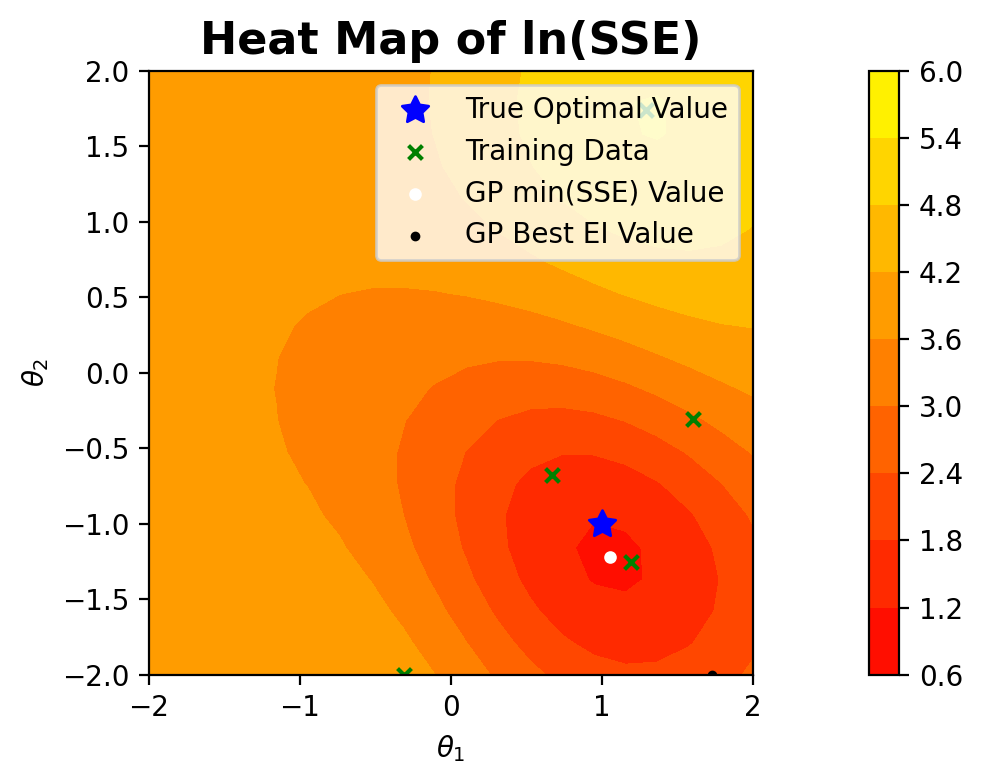

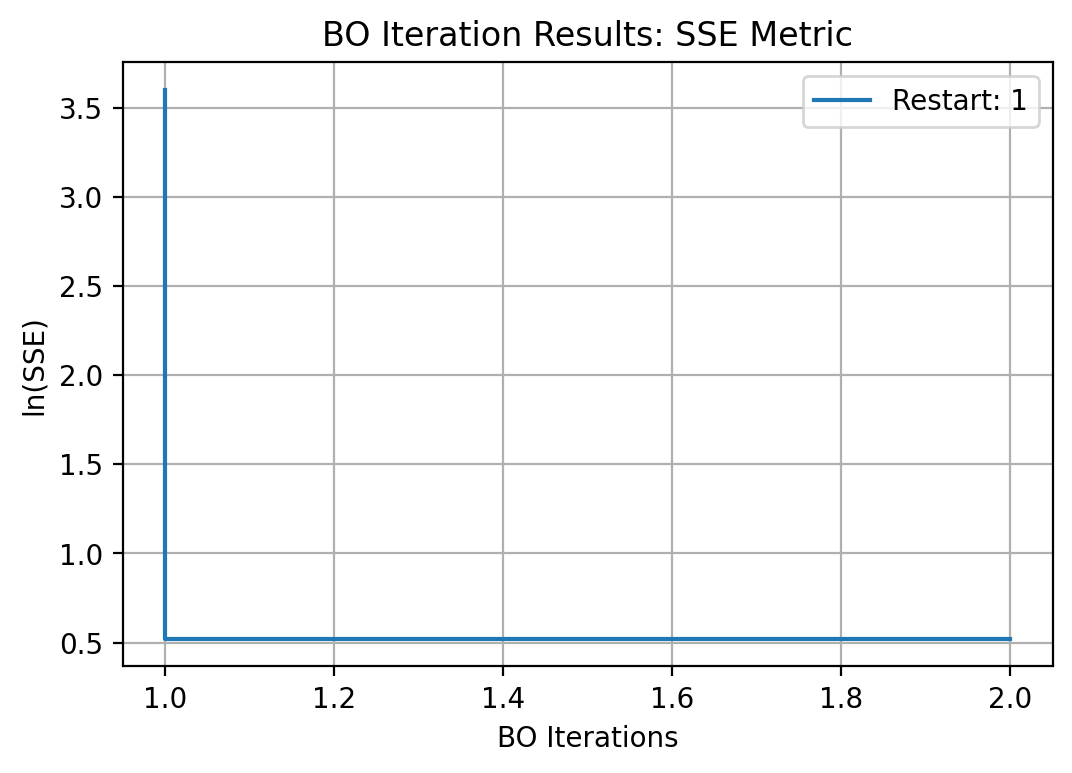

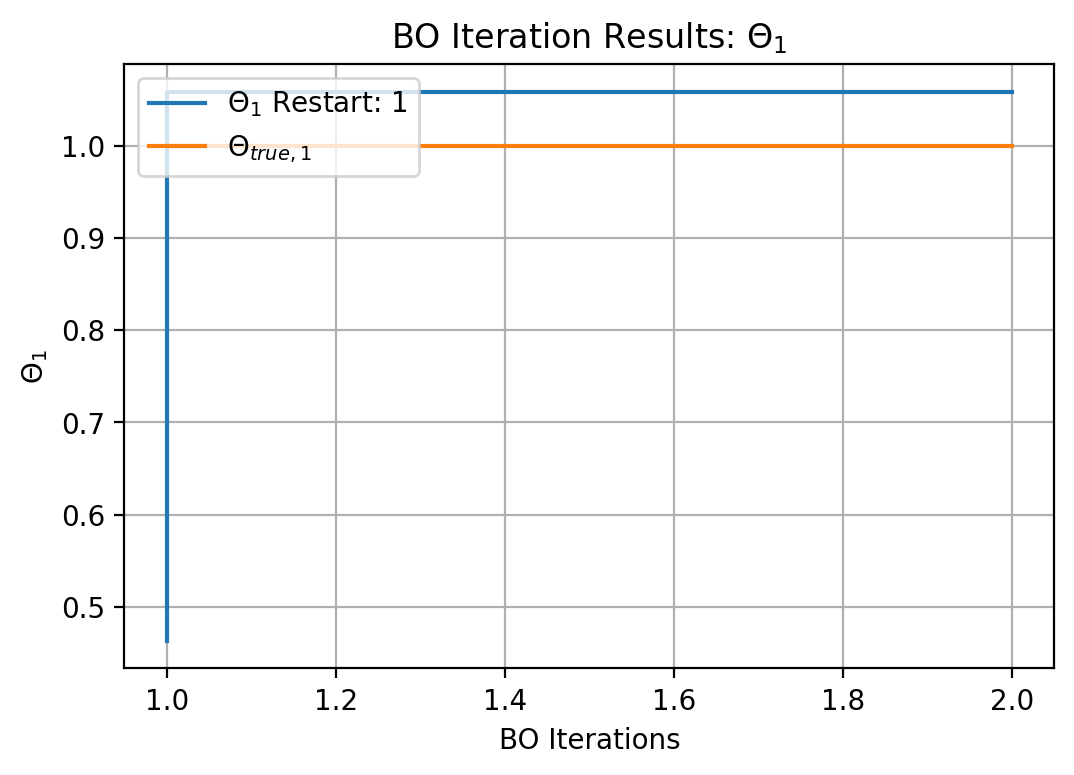

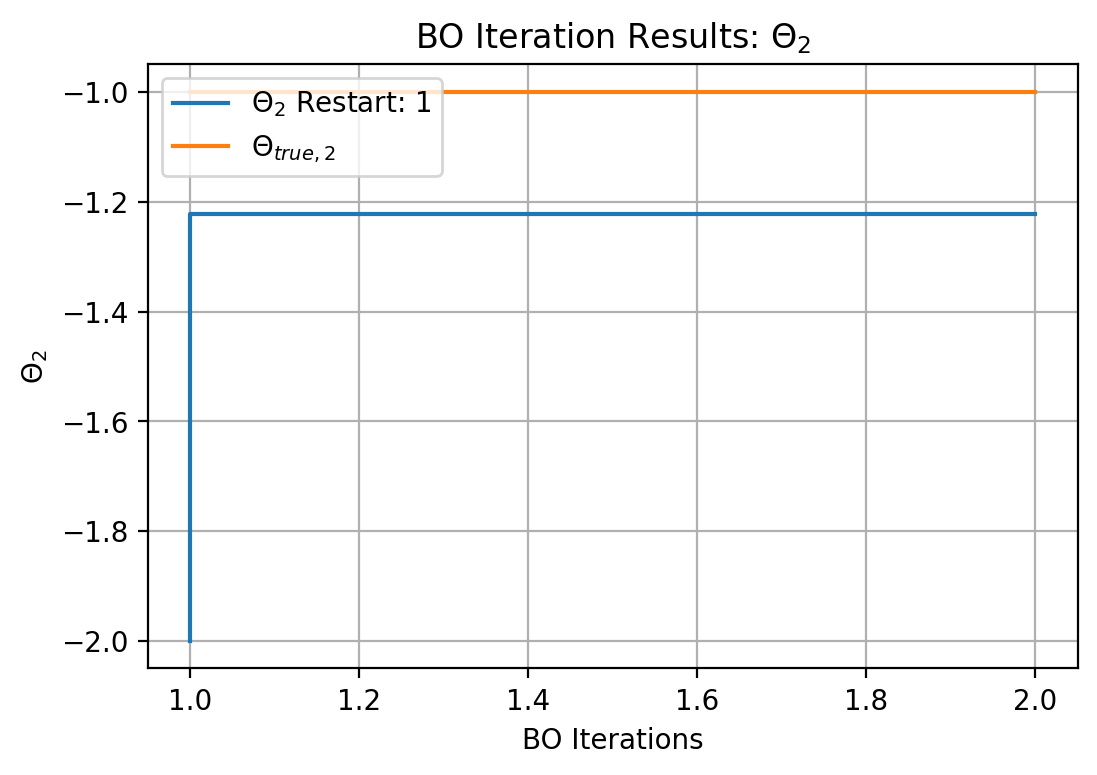

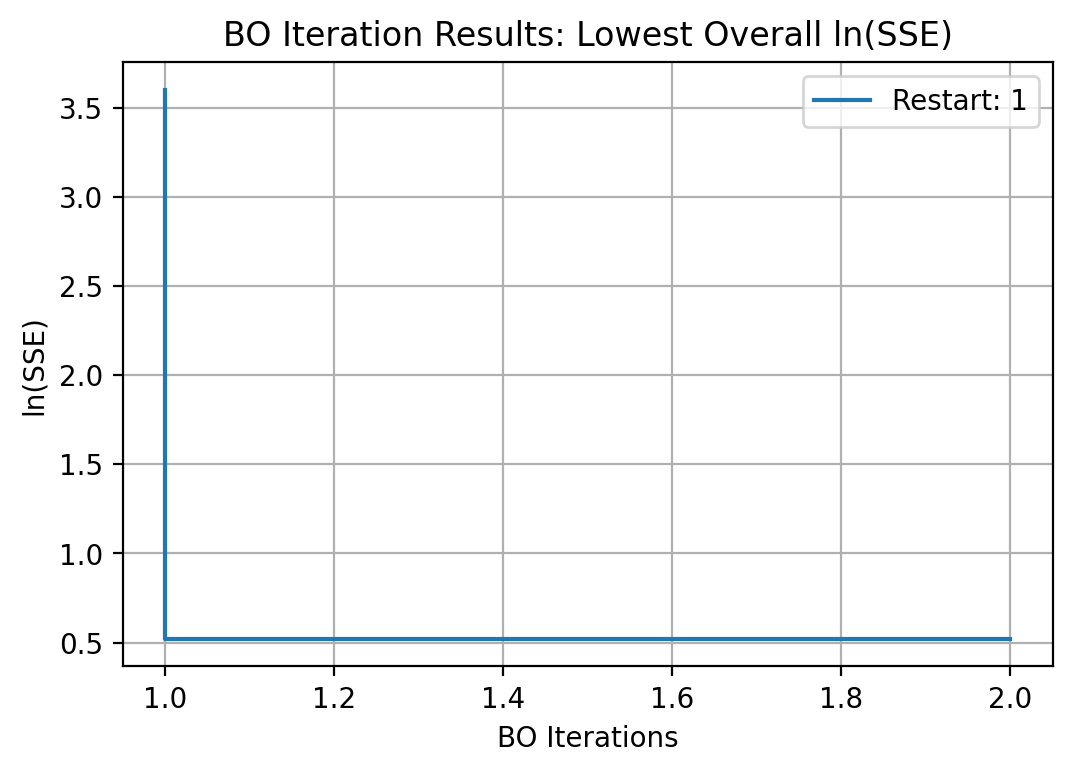

The GP predicts the lowest SSE of 1.682e+00 occurs at θ = [ 1.05807172 -1.2230177 ] during restart 1 at BO iteration 2
 

Lengthscale Set As: None
Explore Bias: 5.0
Restart Number:  1


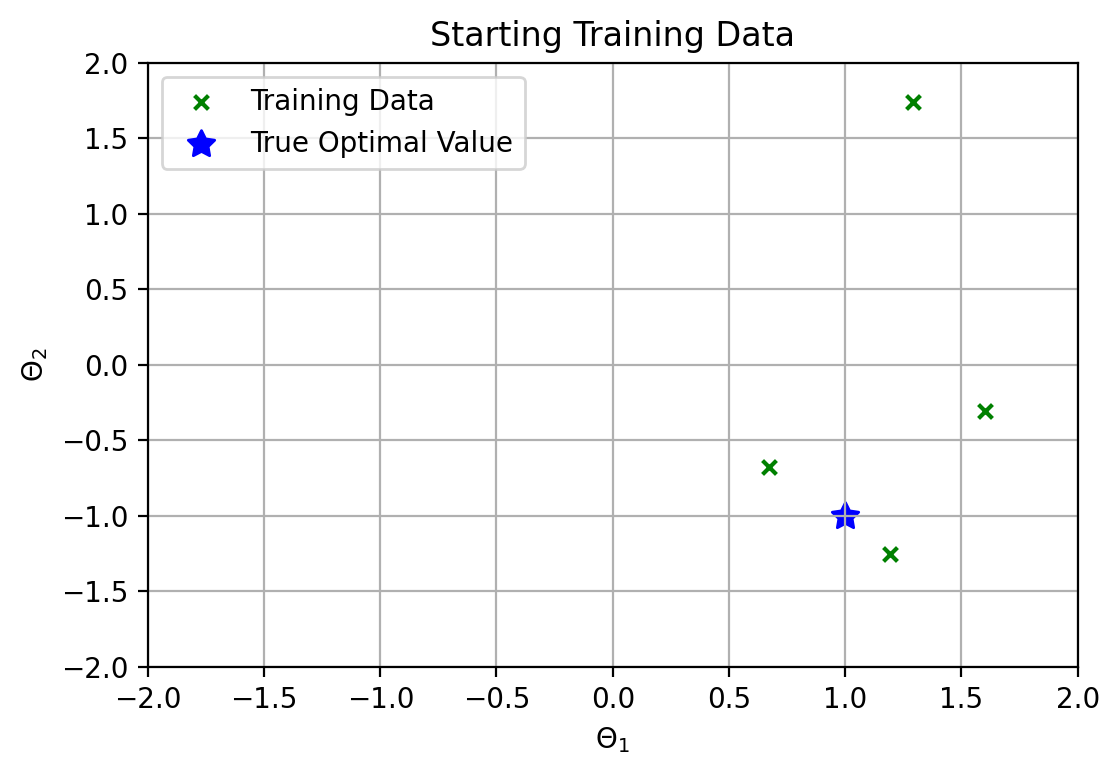

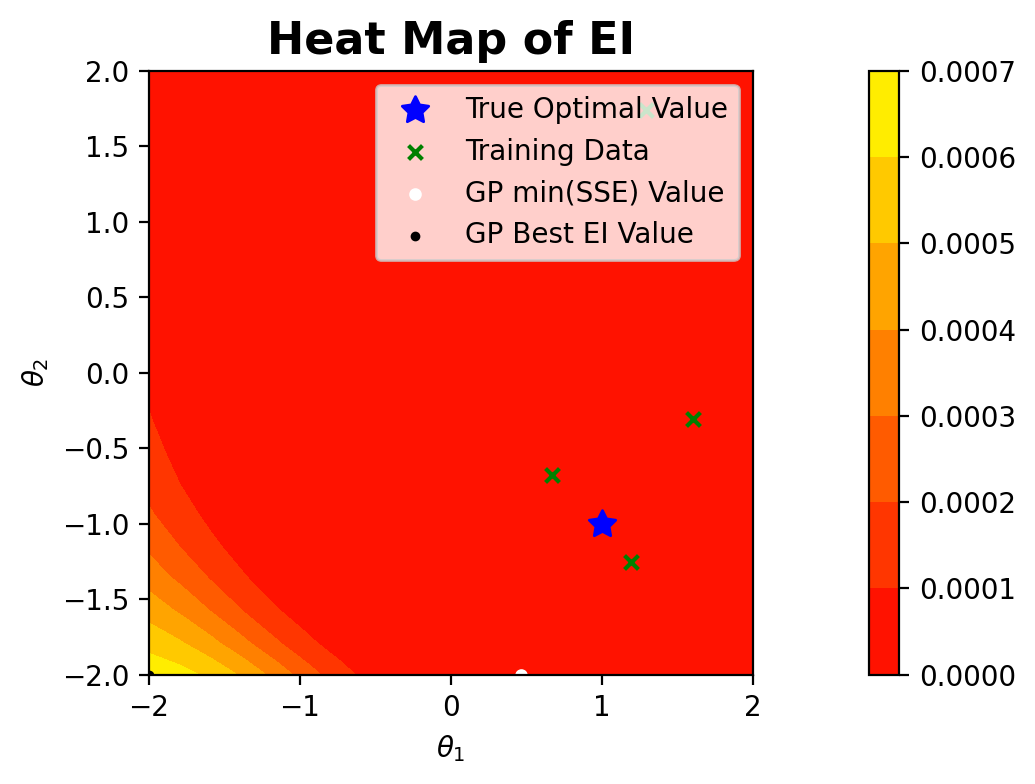

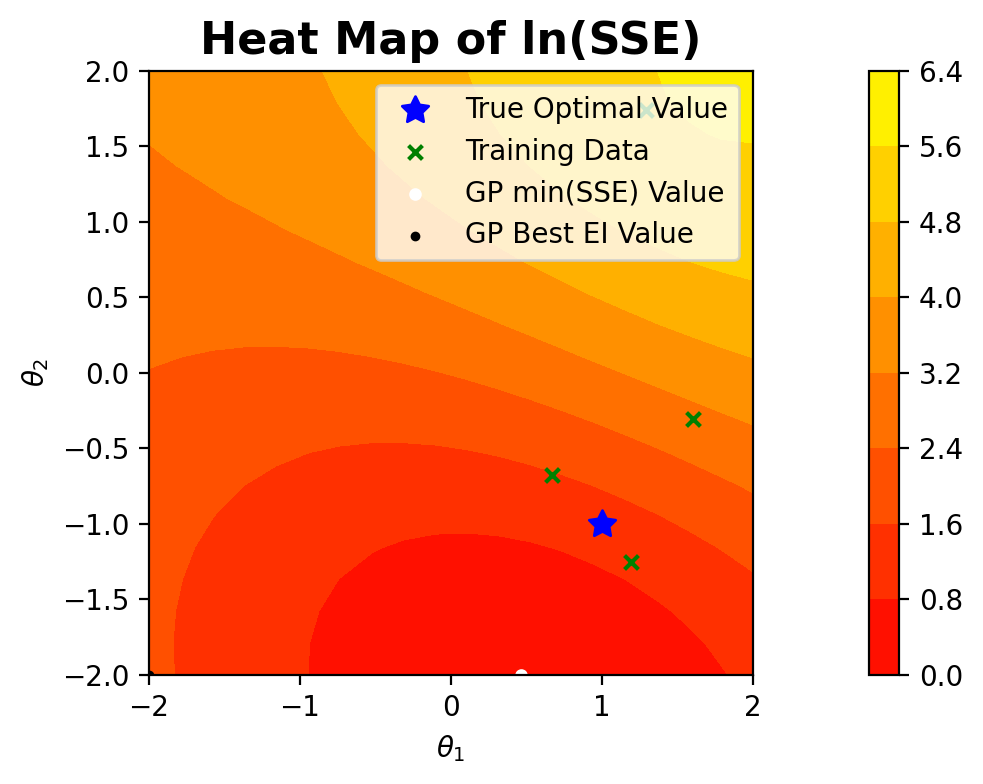

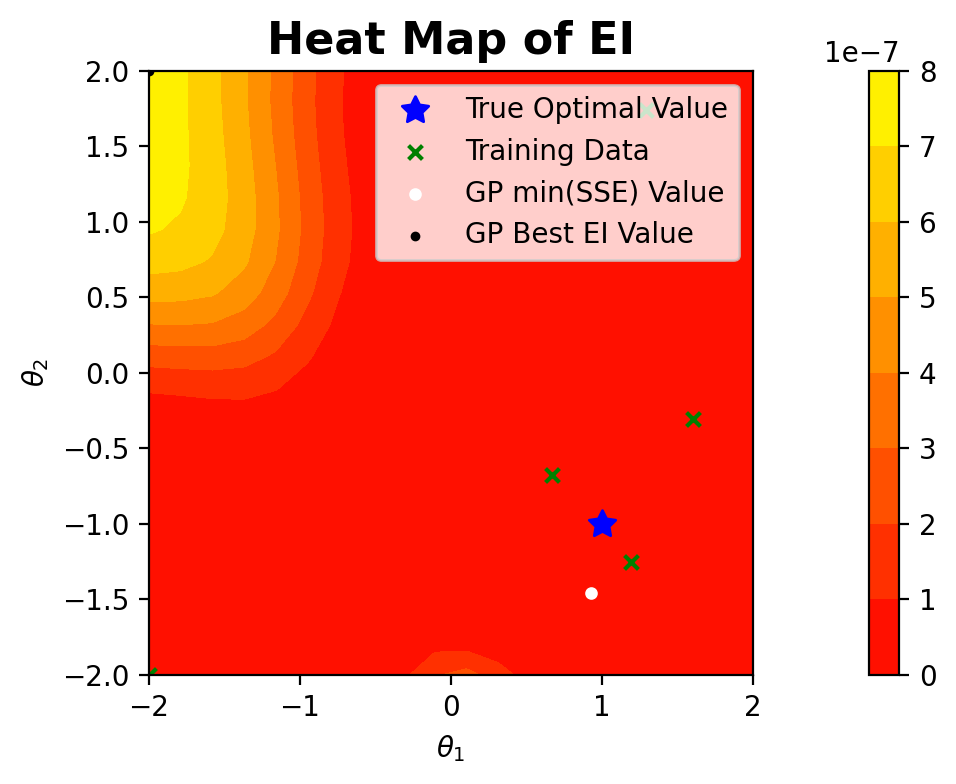

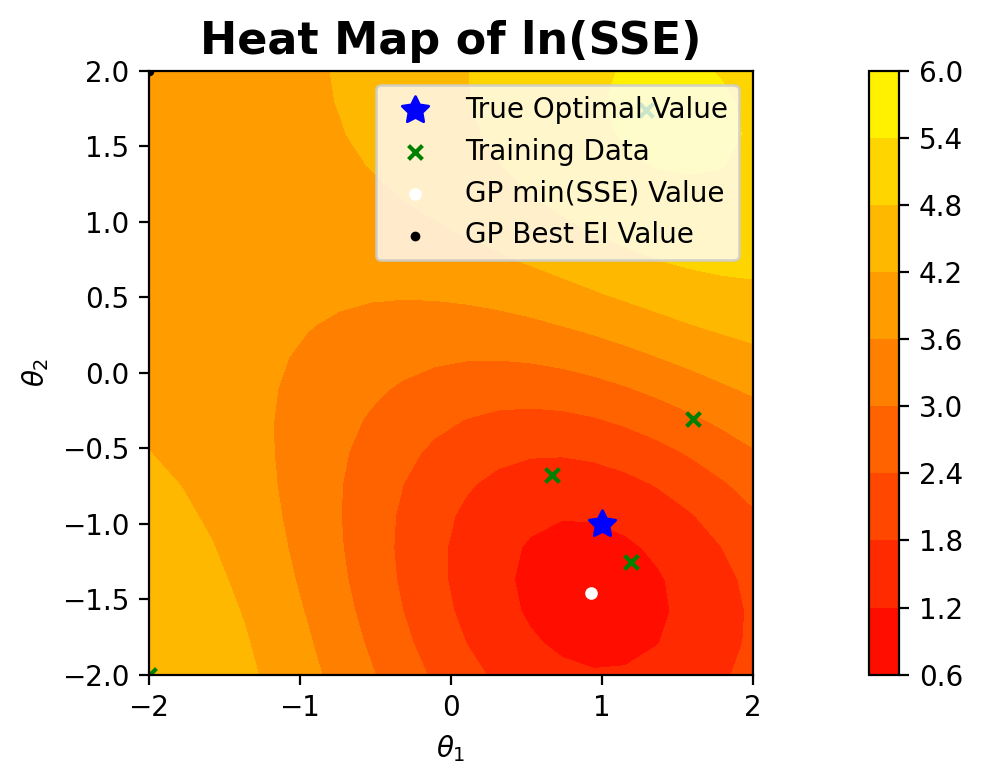

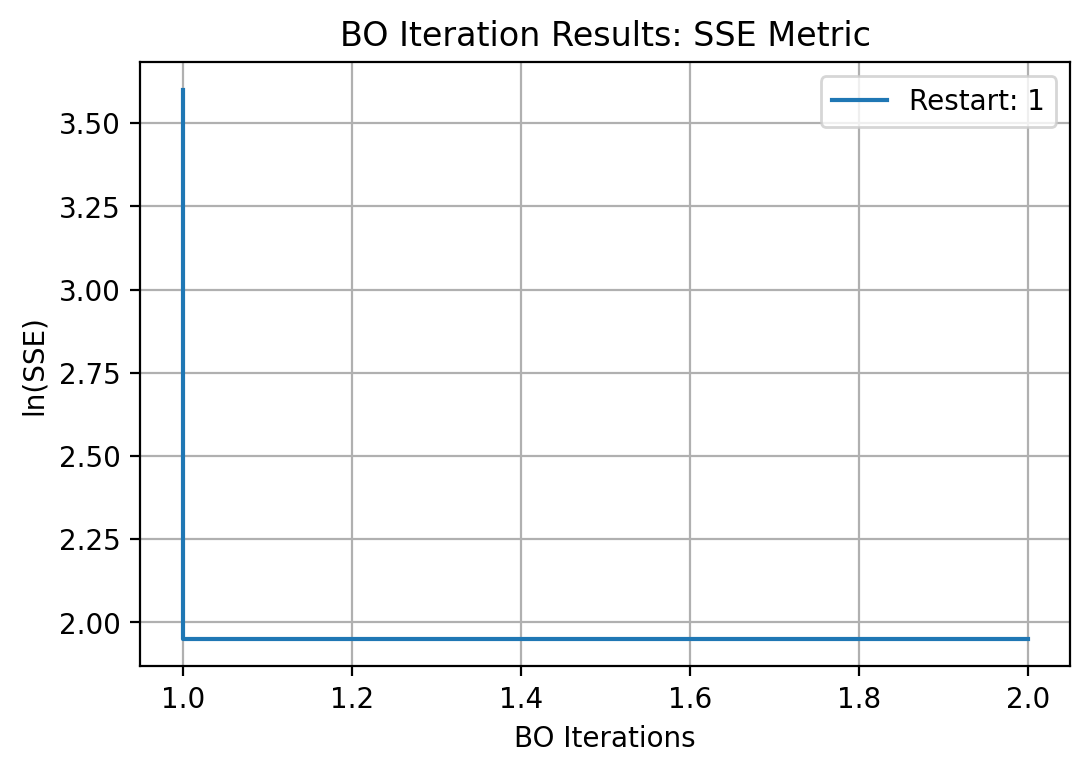

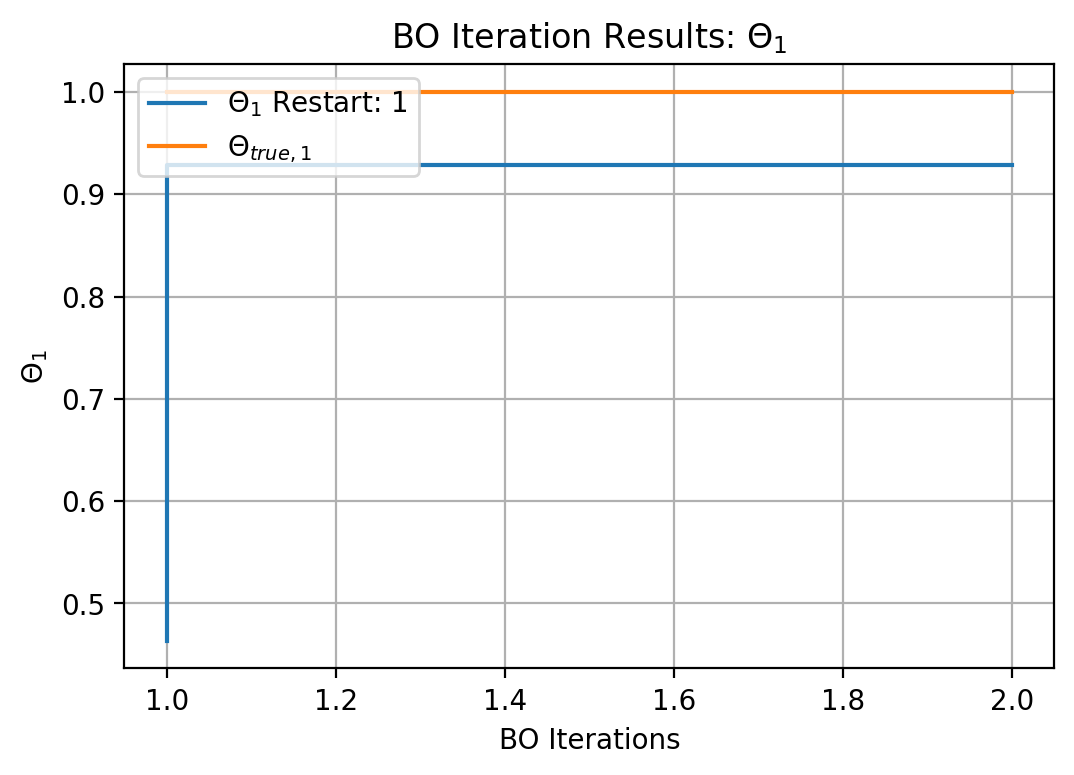

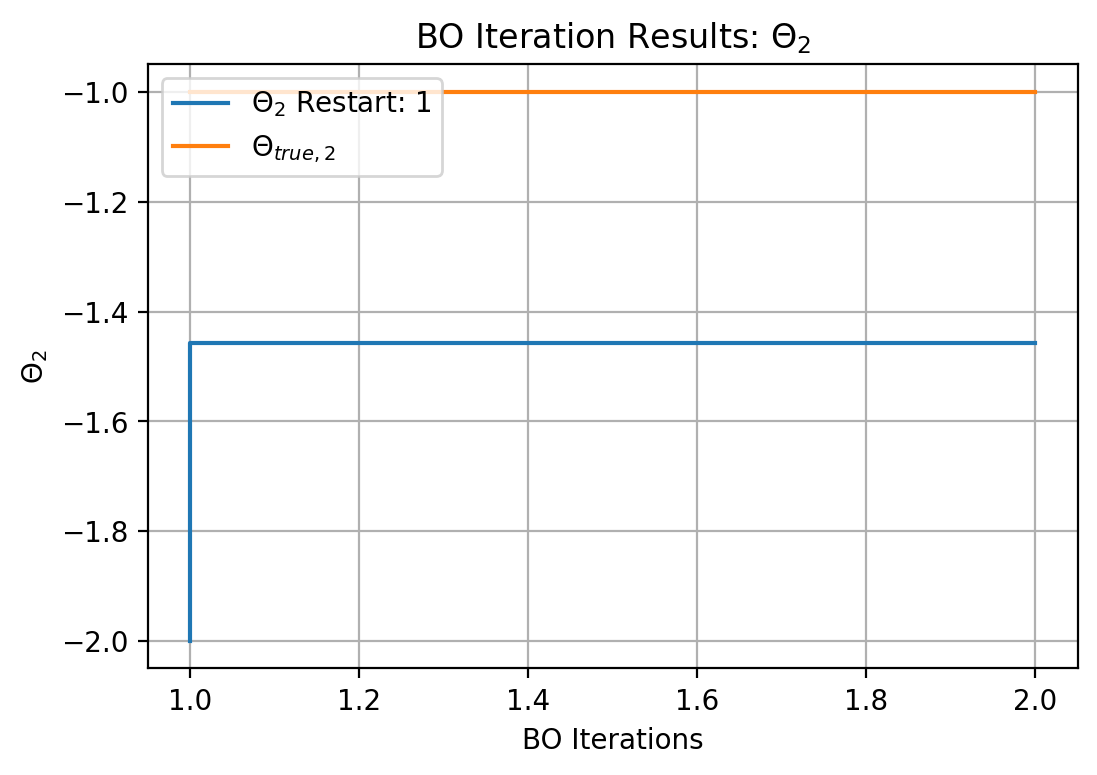

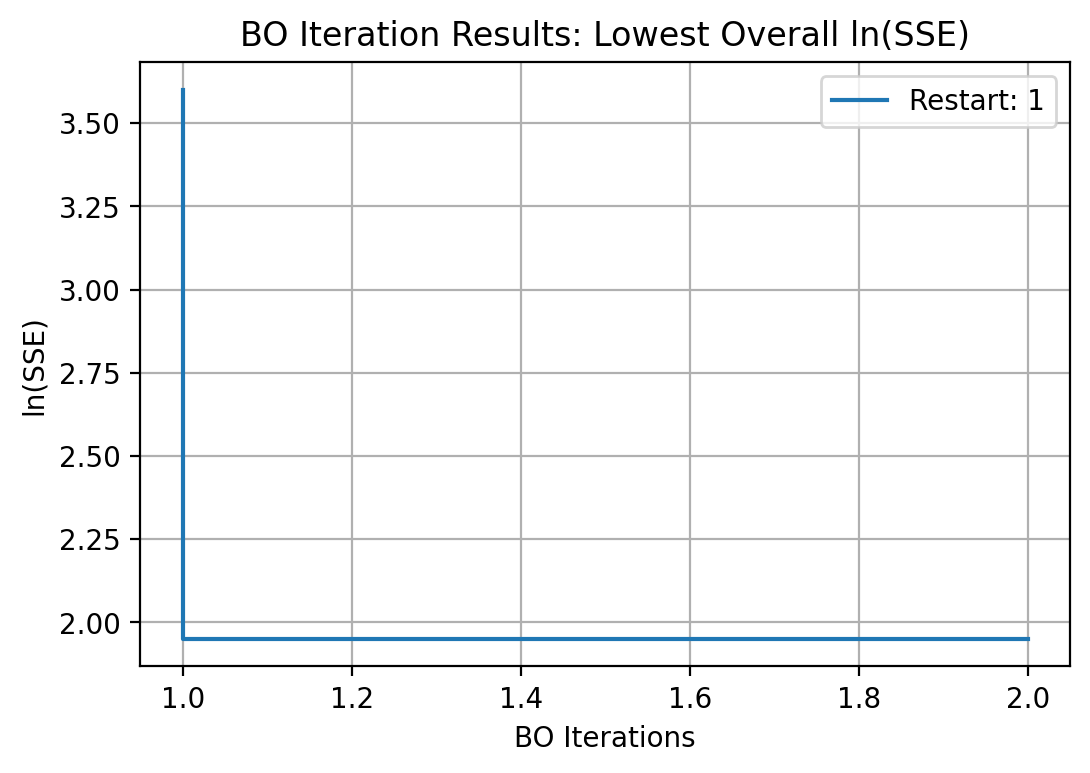

The GP predicts the lowest SSE of 7.029e+00 occurs at θ = [ 0.92866896 -1.45662879] during restart 1 at BO iteration 2
 

Lengthscale Set As: 0.5
Explore Bias: 0.0
Restart Number:  1


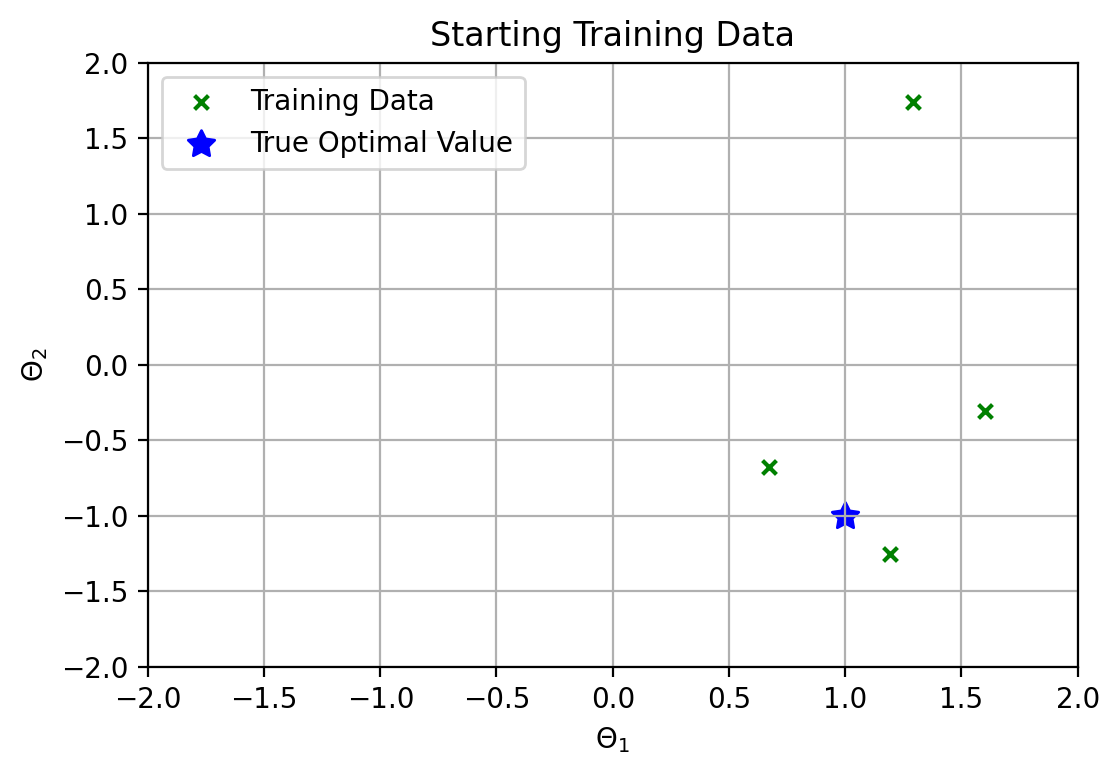

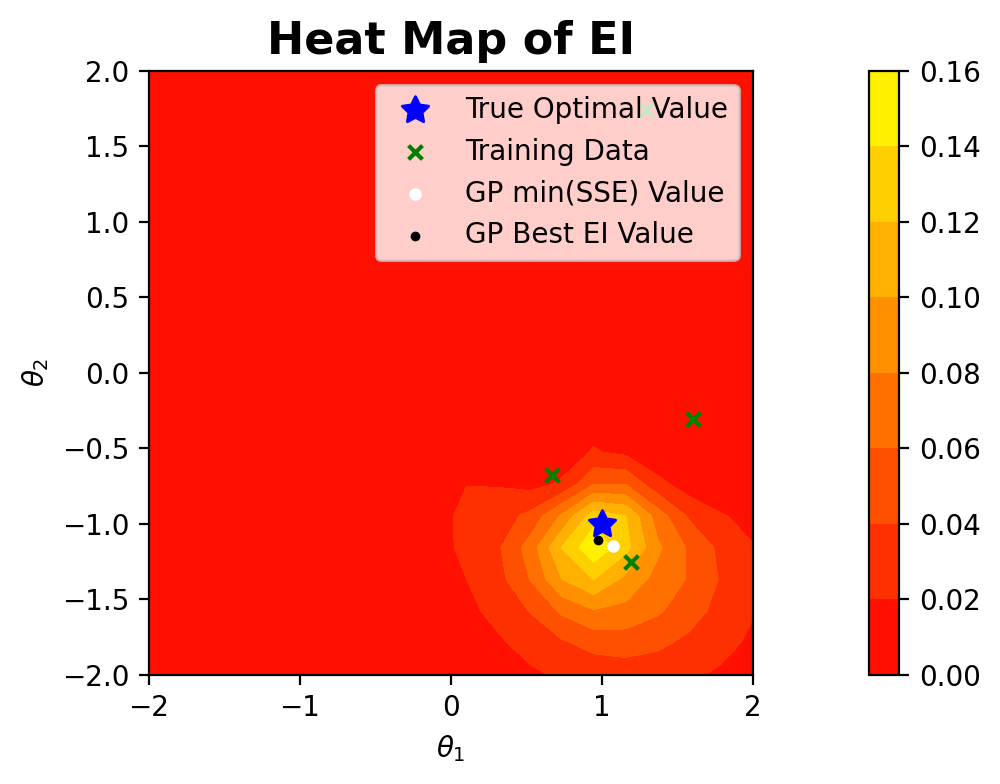

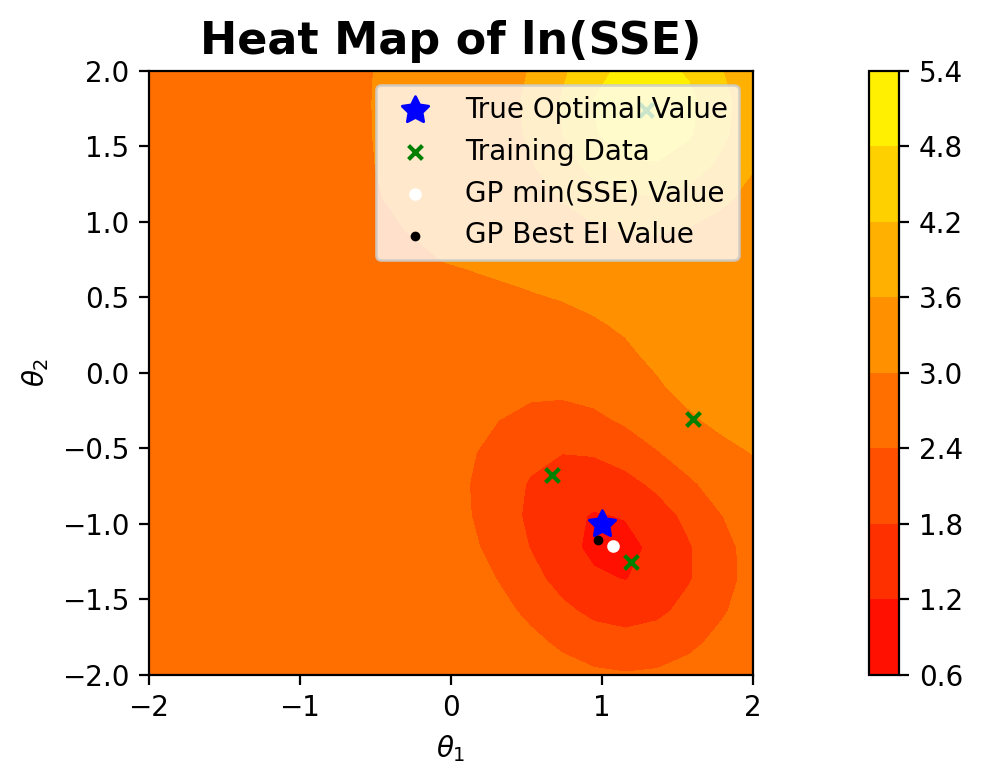

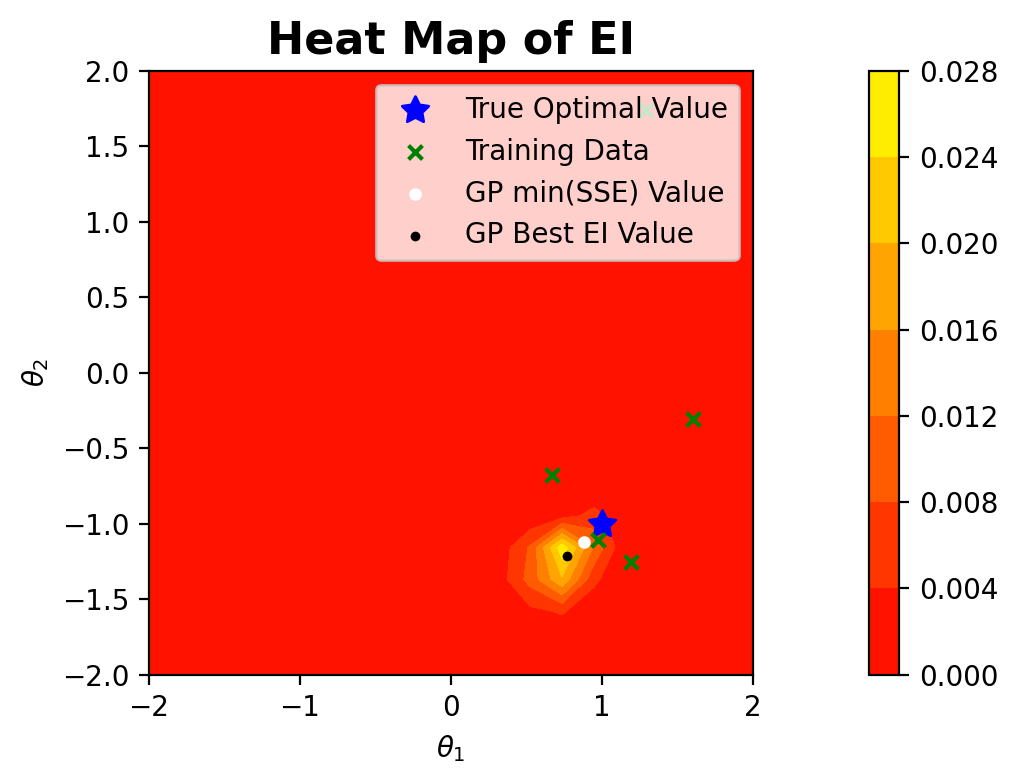

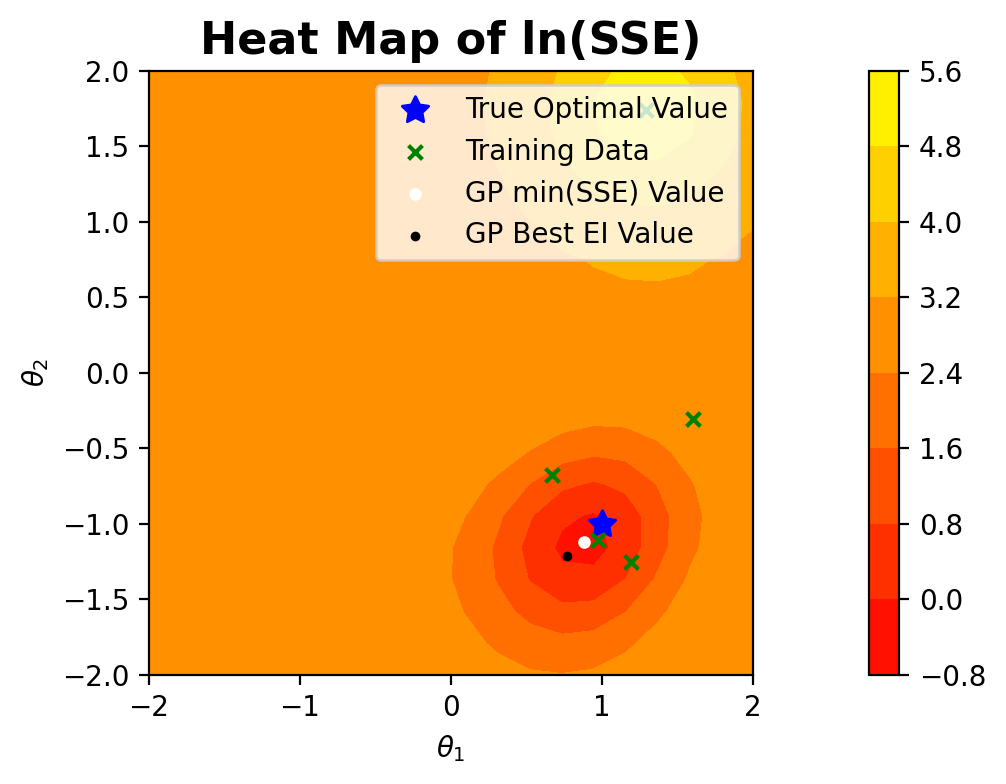

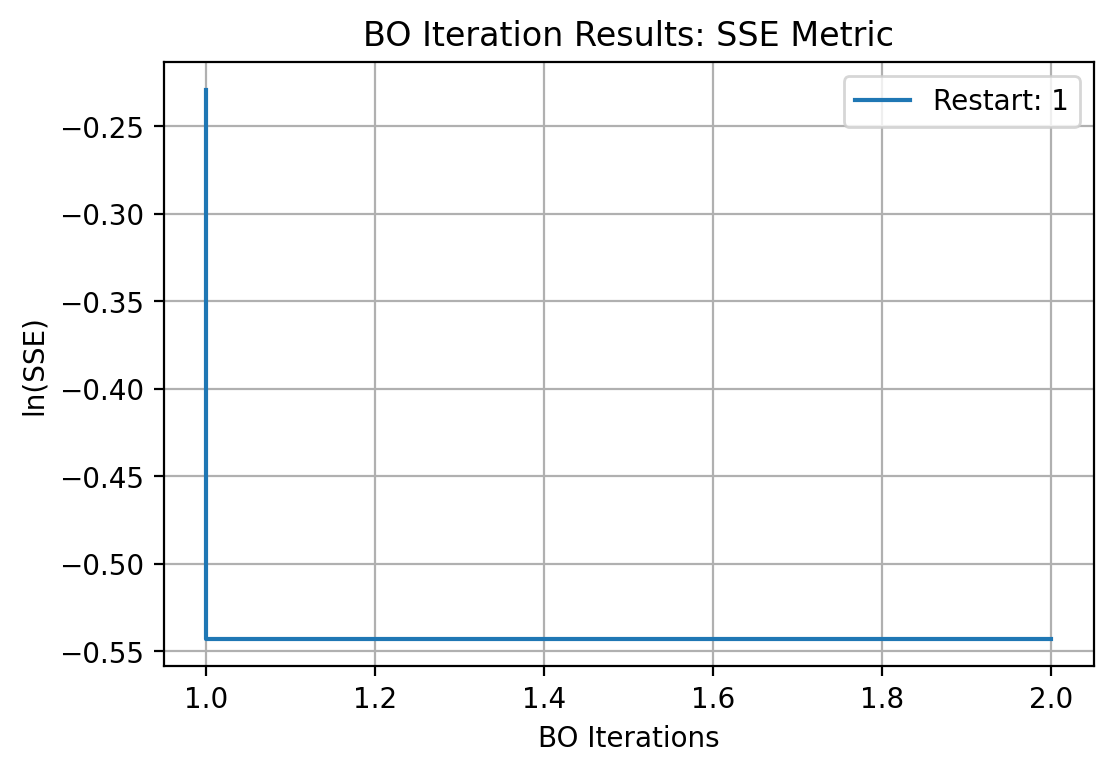

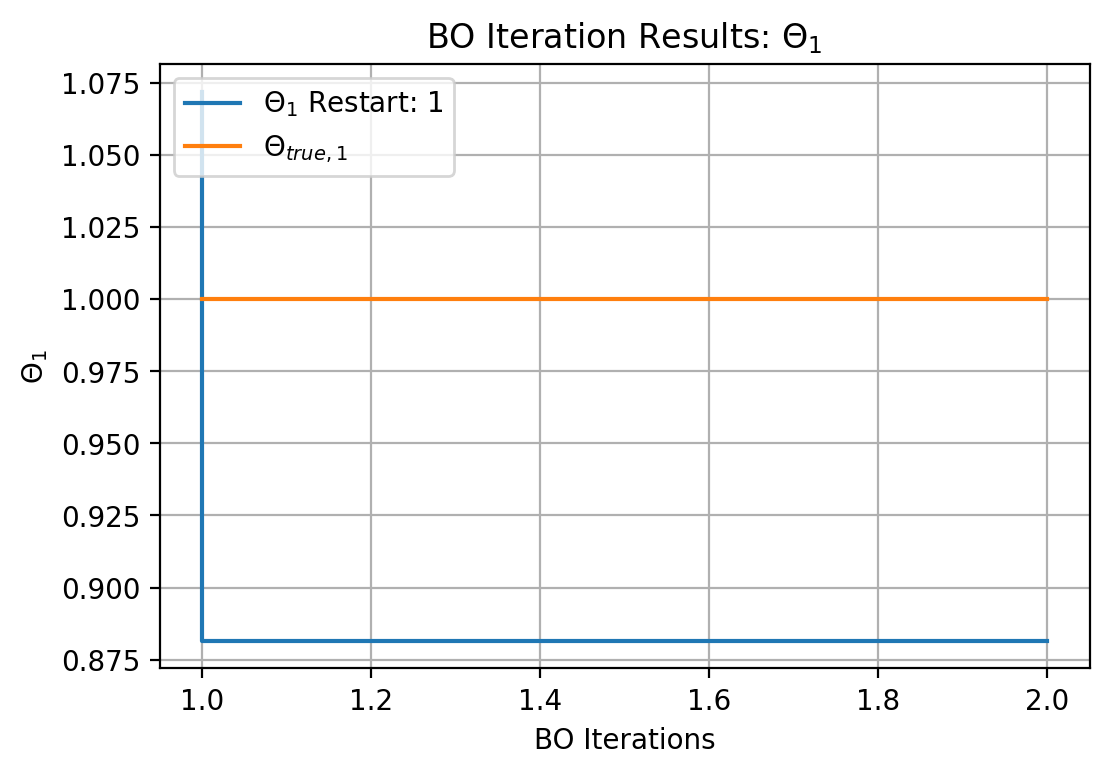

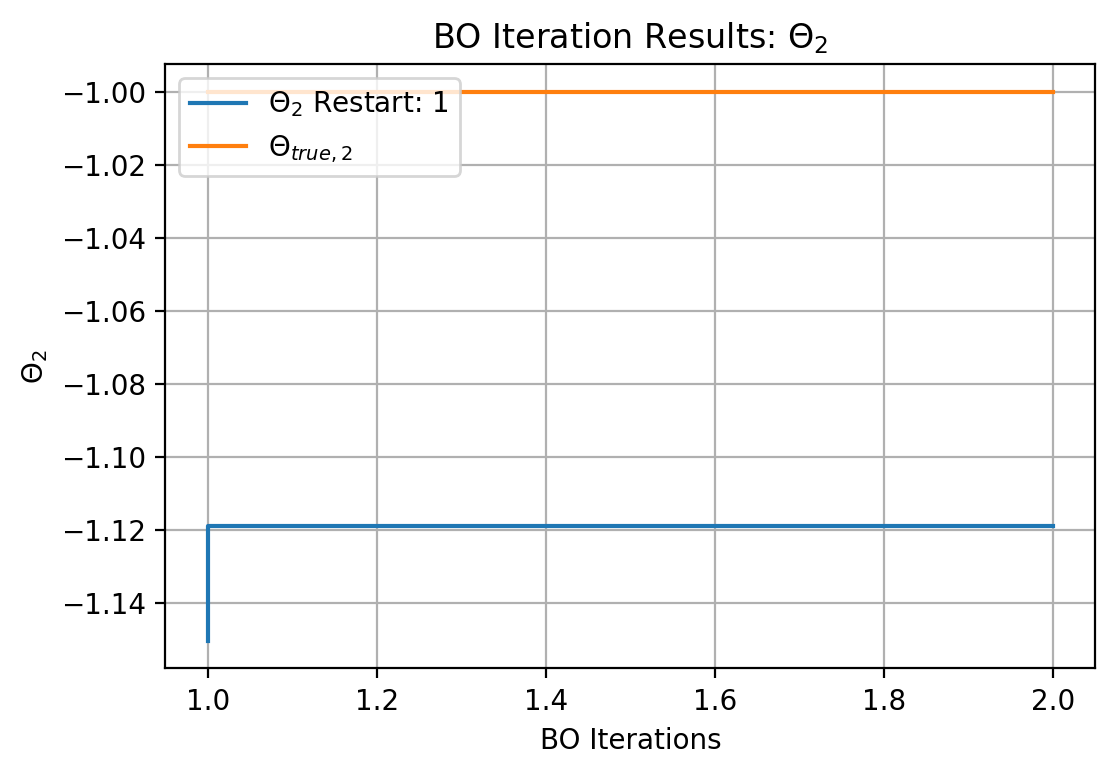

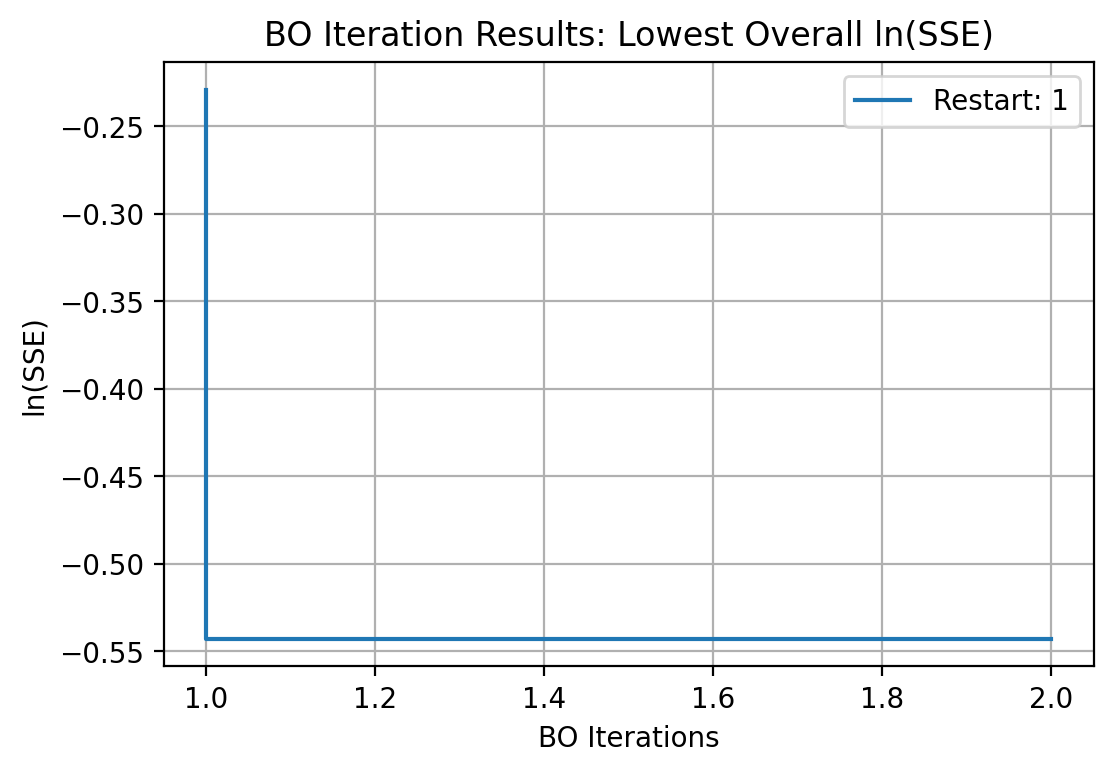

The GP predicts the lowest SSE of 5.810e-01 occurs at θ = [ 0.88146052 -1.11893731] during restart 1 at BO iteration 2
 

Lengthscale Set As: 0.5
Explore Bias: 0.5
Restart Number:  1


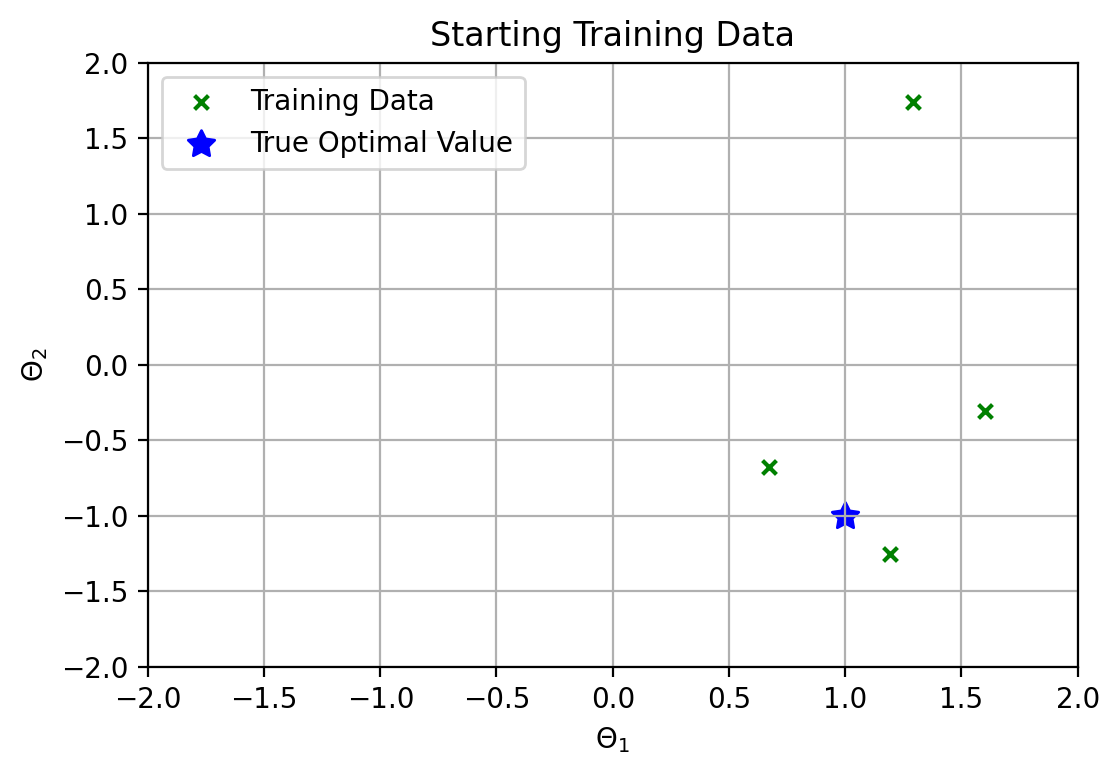

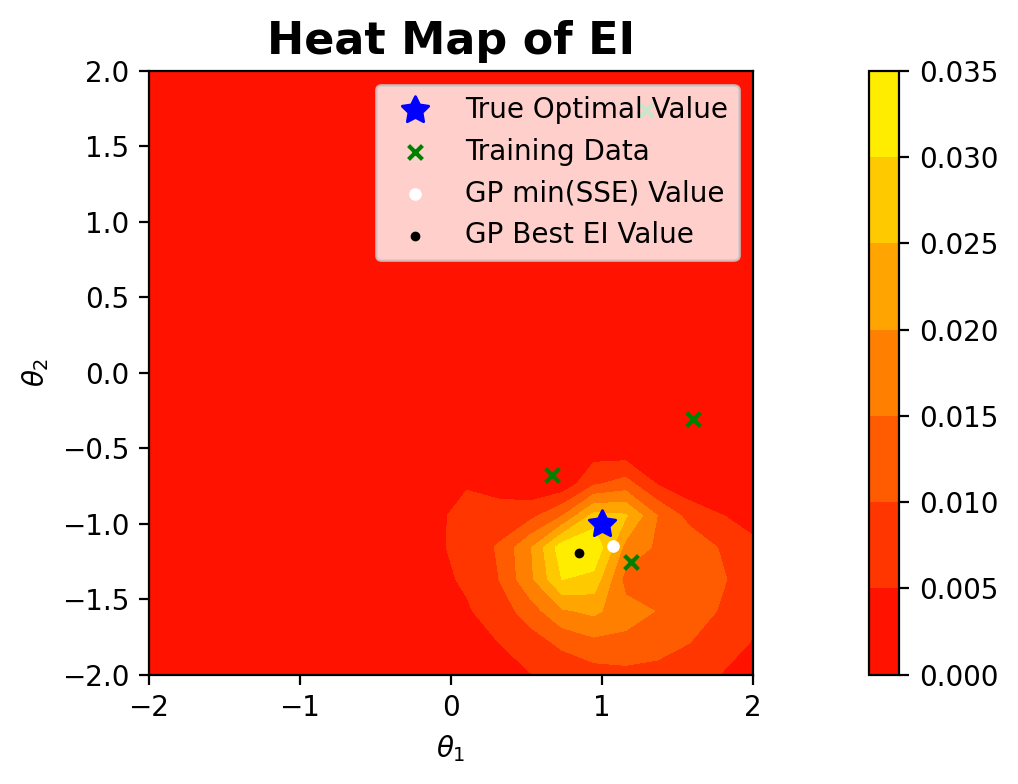

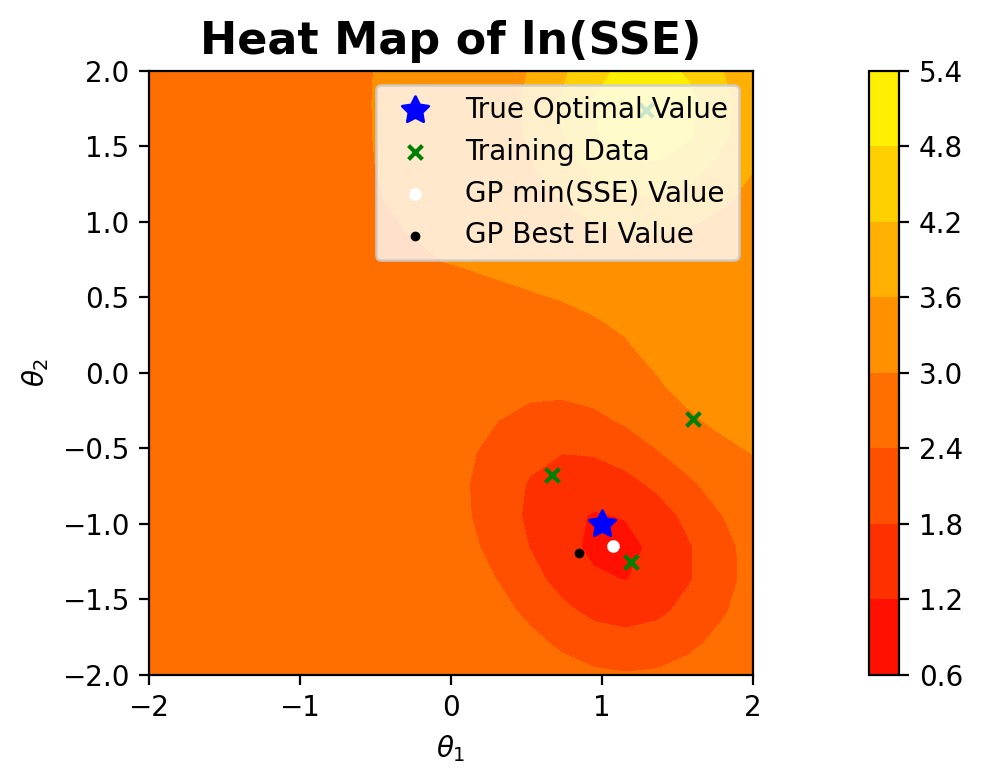

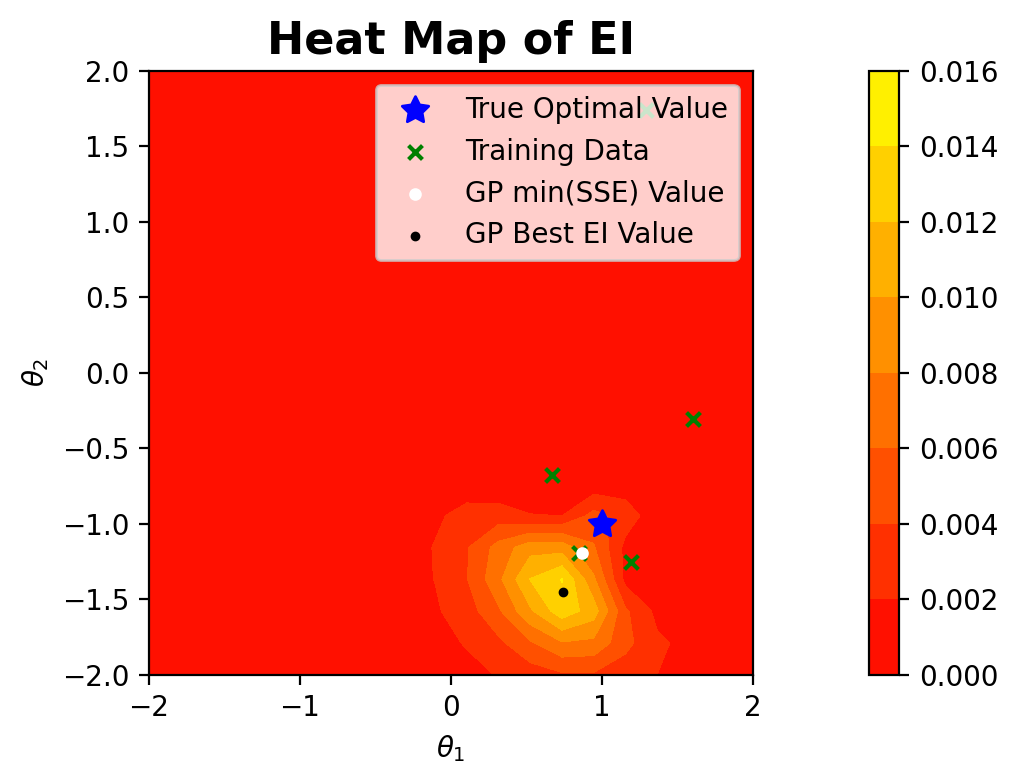

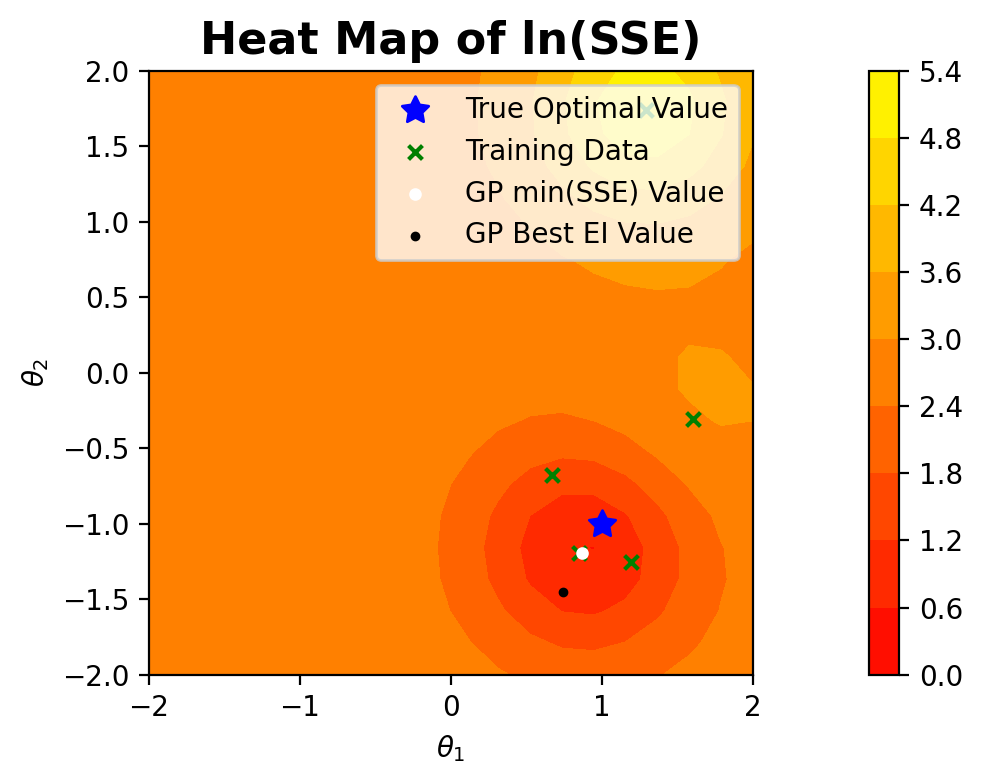

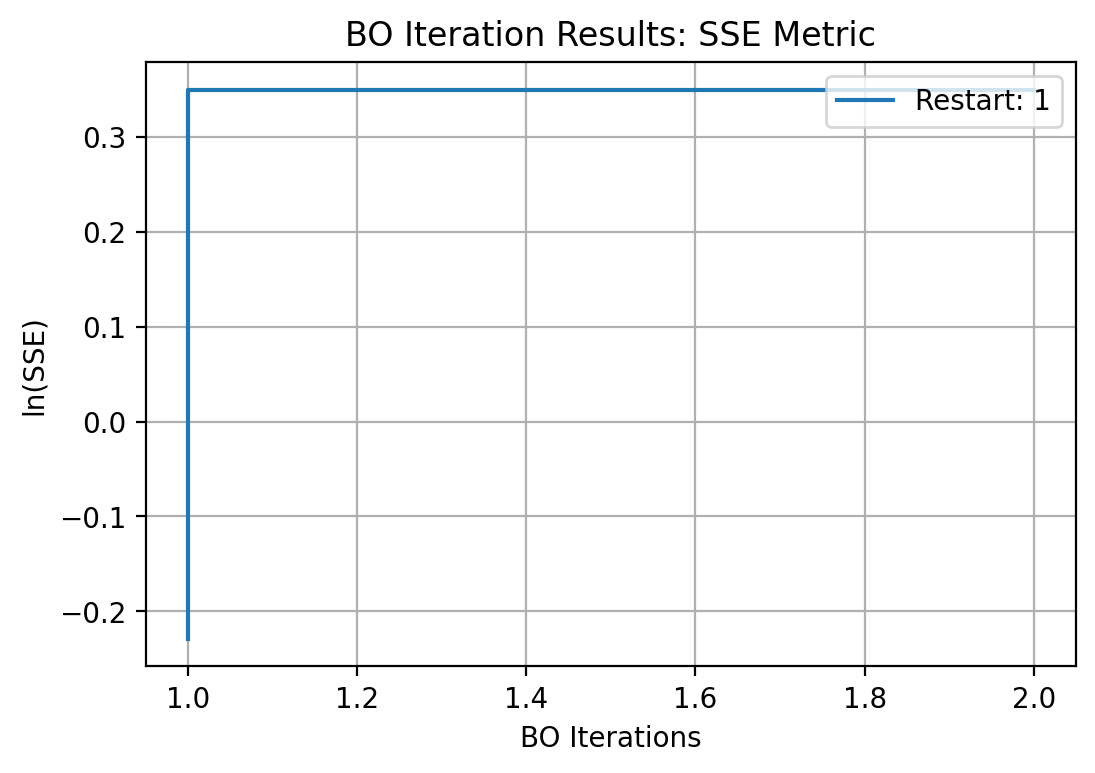

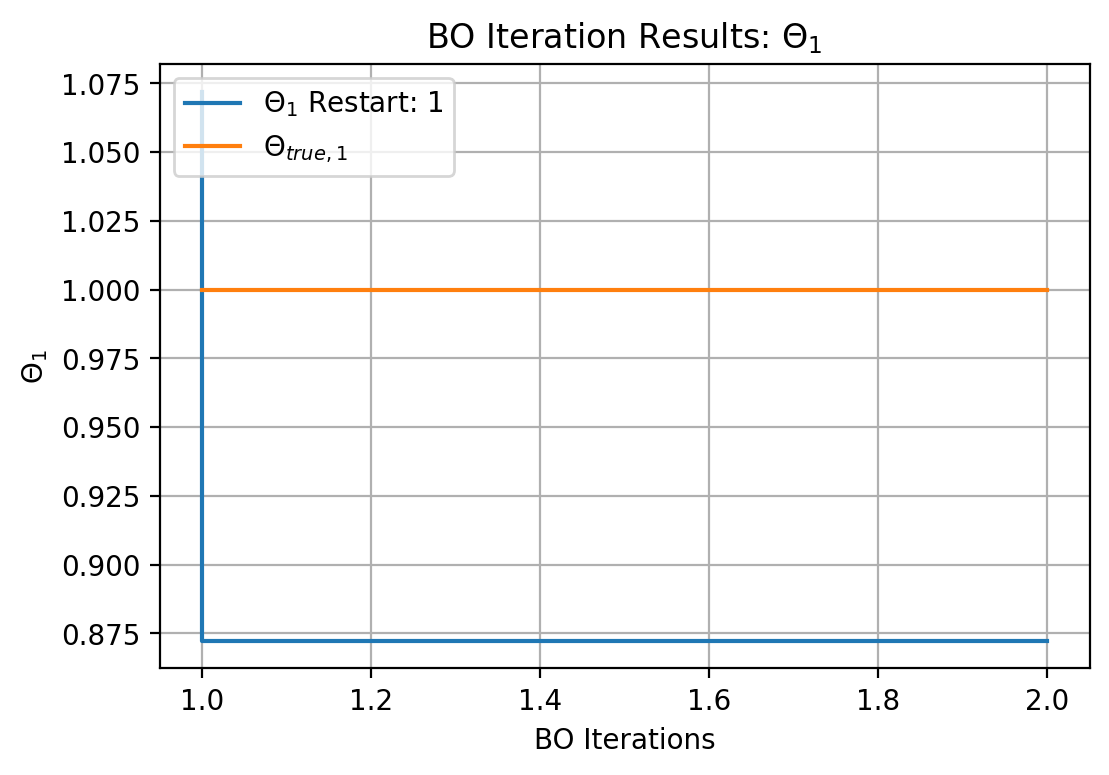

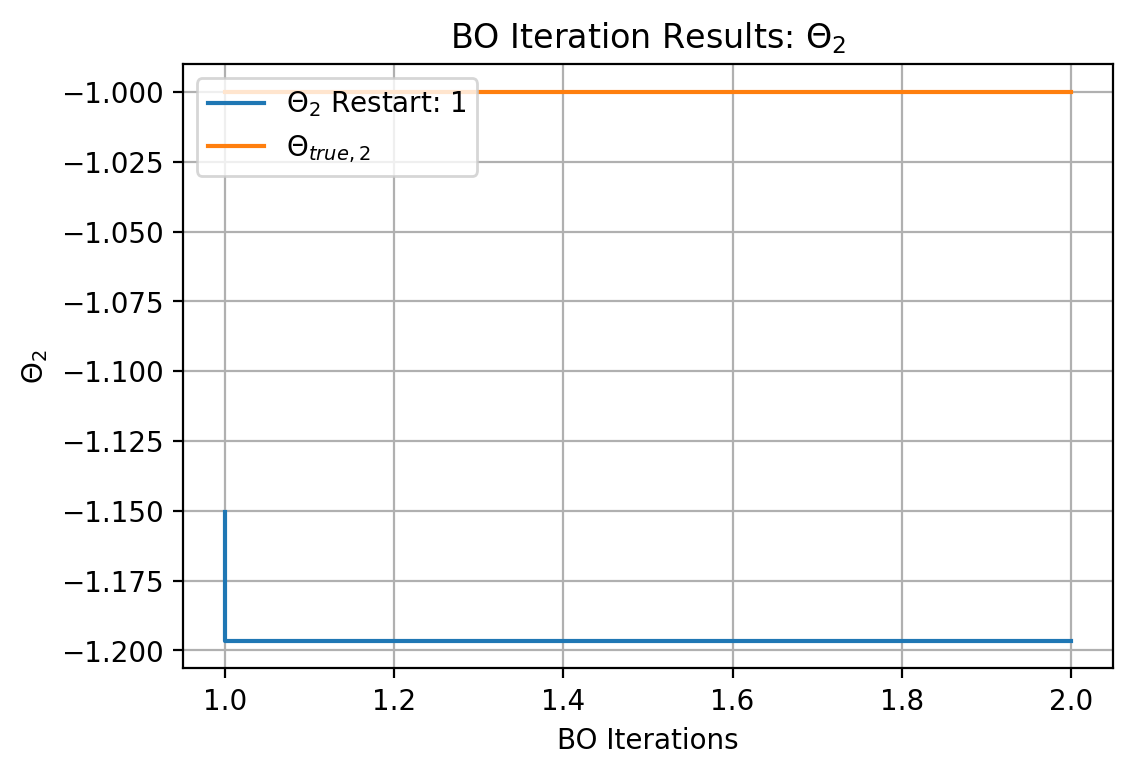

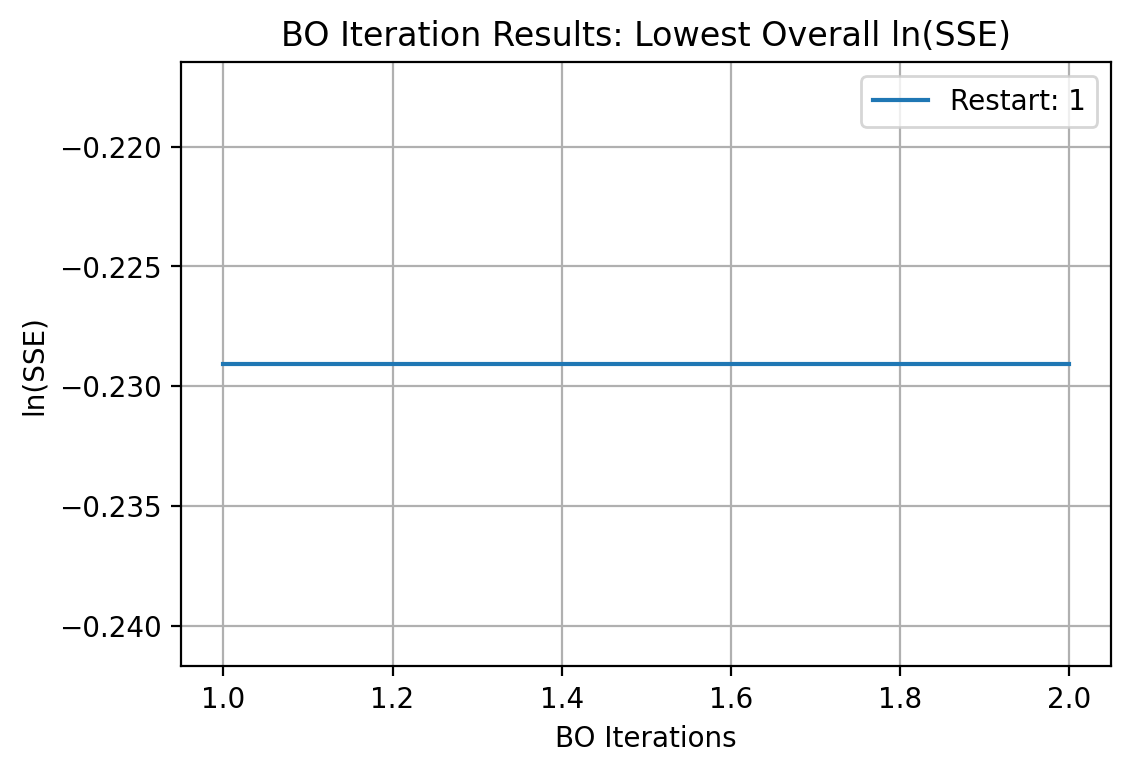

The GP predicts the lowest SSE of 7.953e-01 occurs at θ = [ 1.07189824 -1.15032974] during restart 1 at BO iteration 1
 

Lengthscale Set As: 0.5
Explore Bias: 0.75
Restart Number:  1


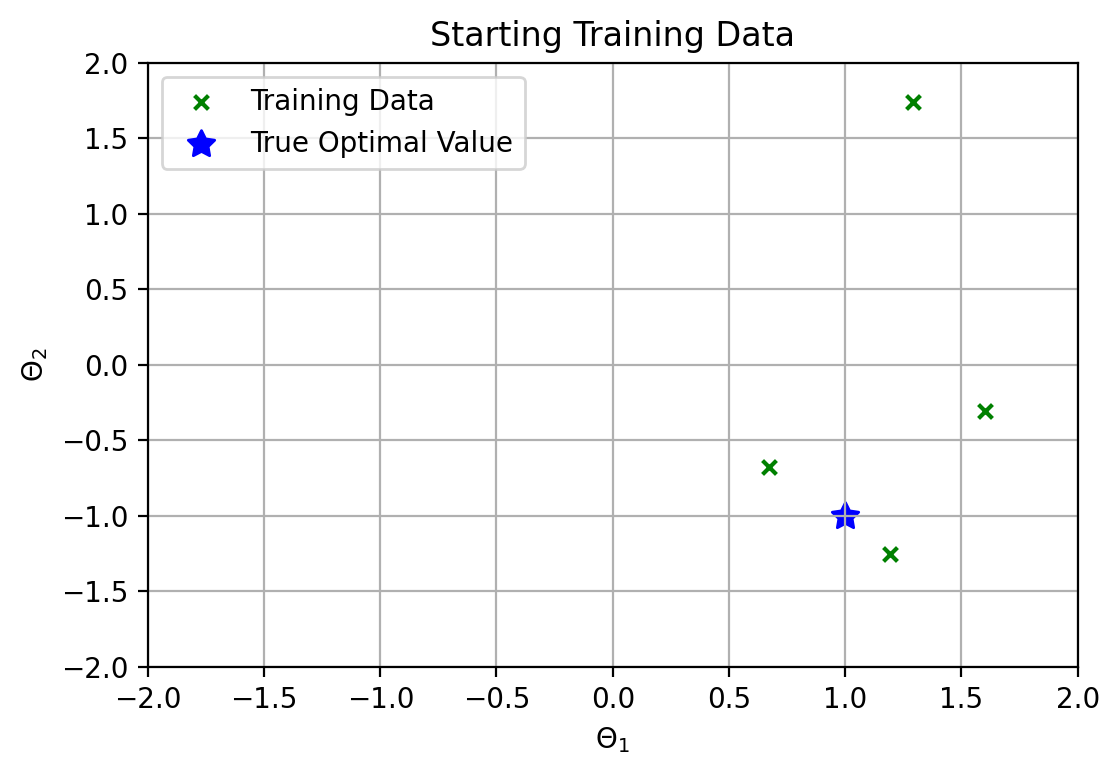

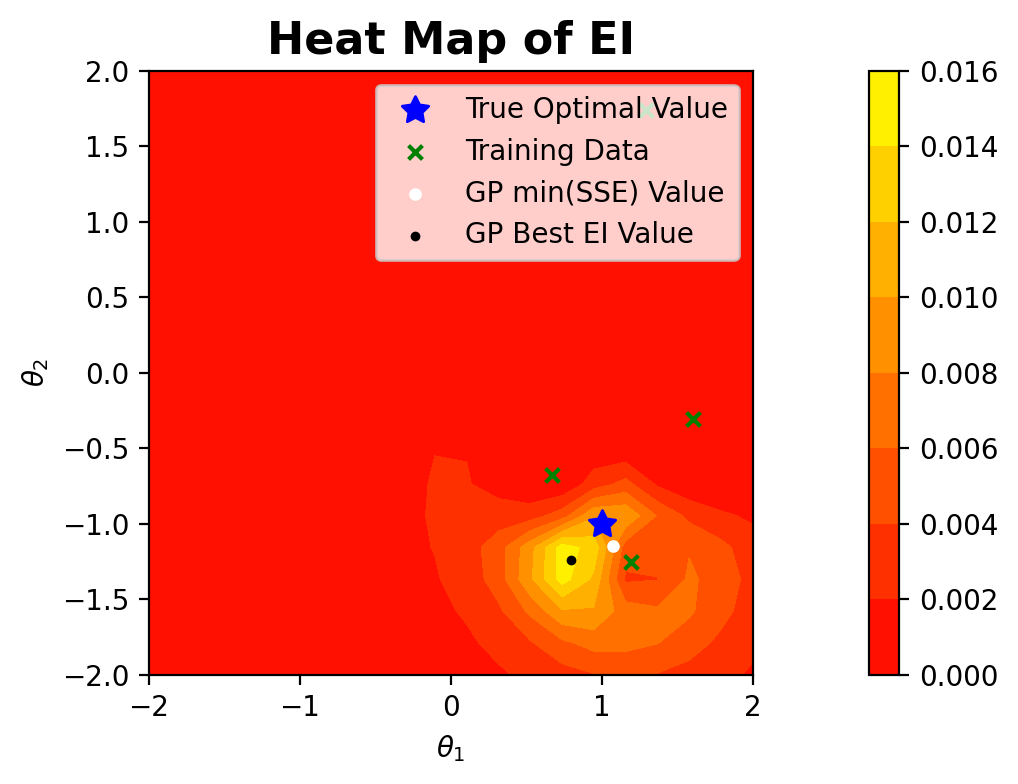

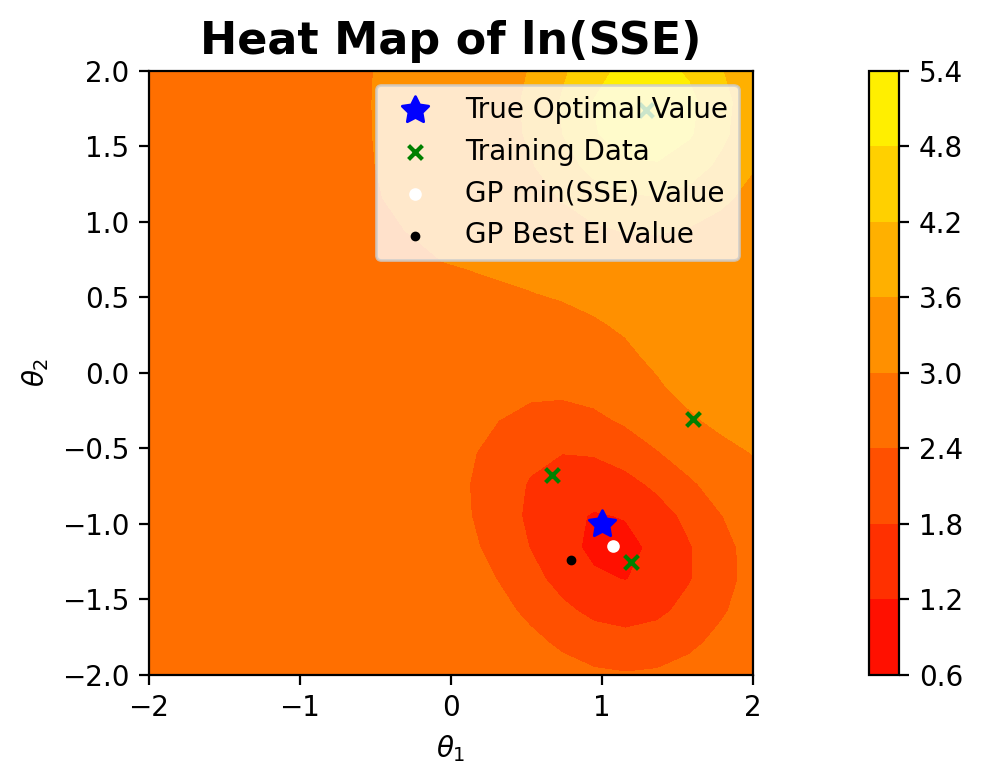

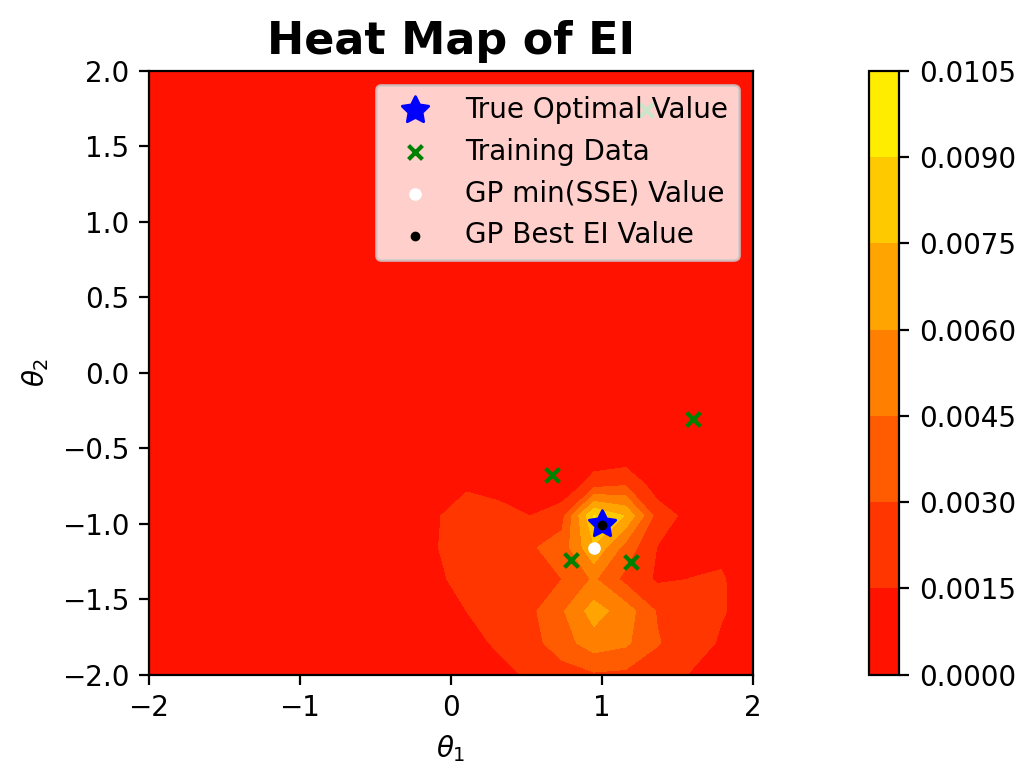

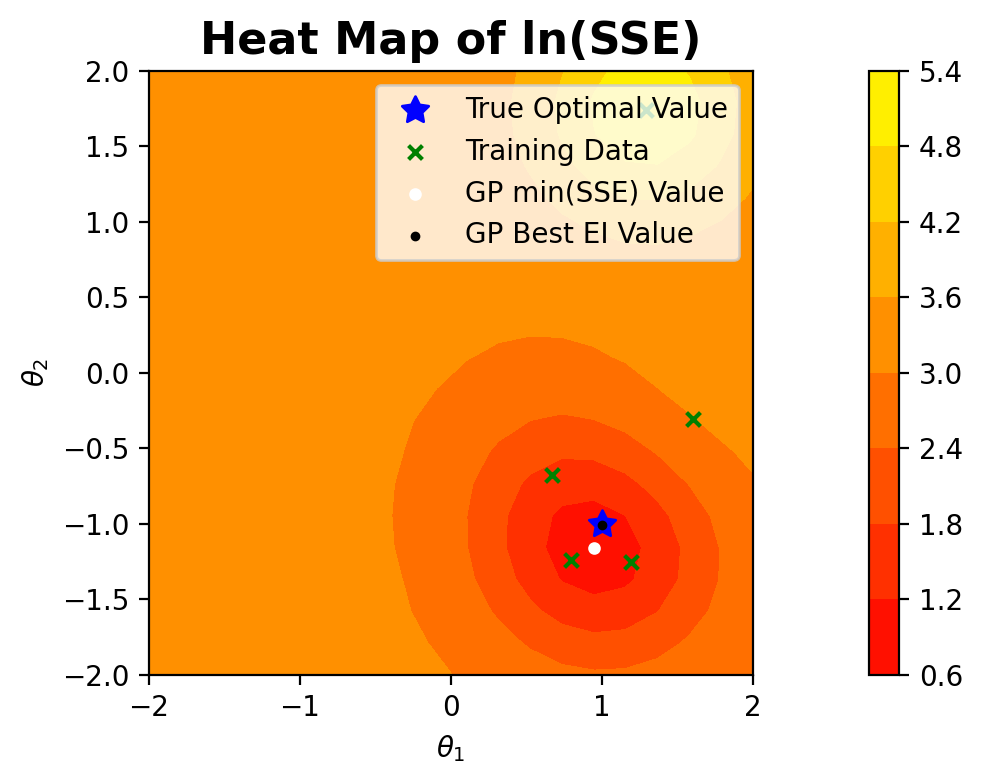

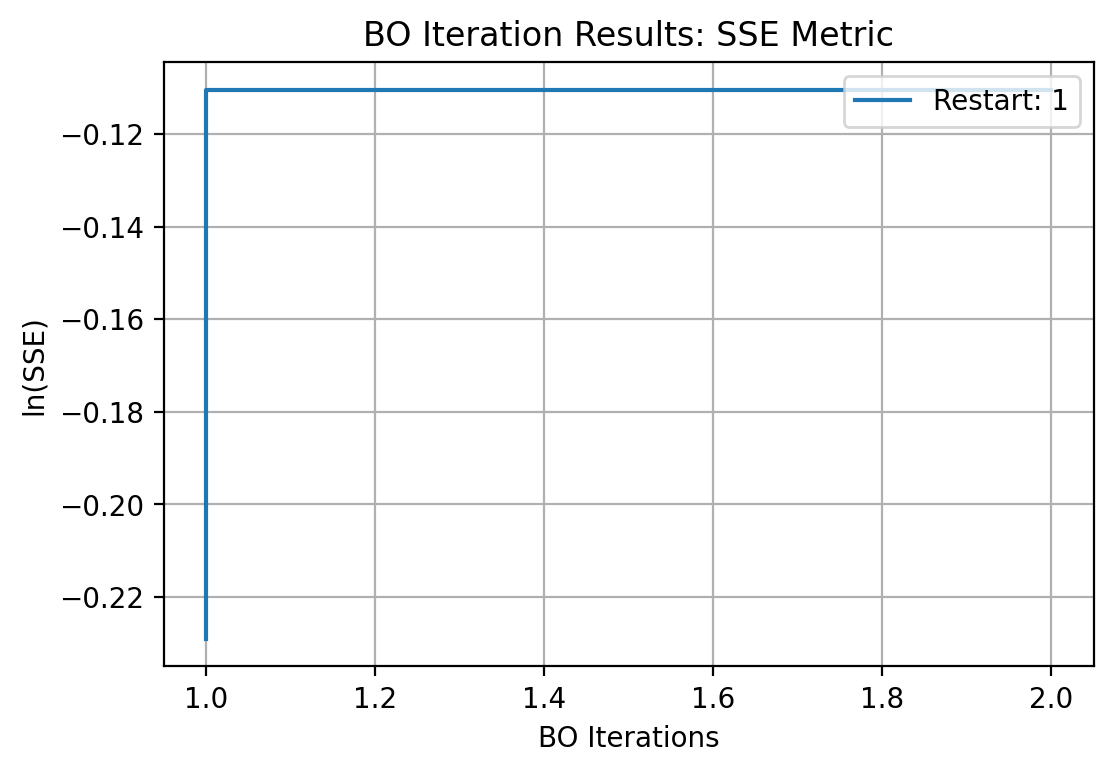

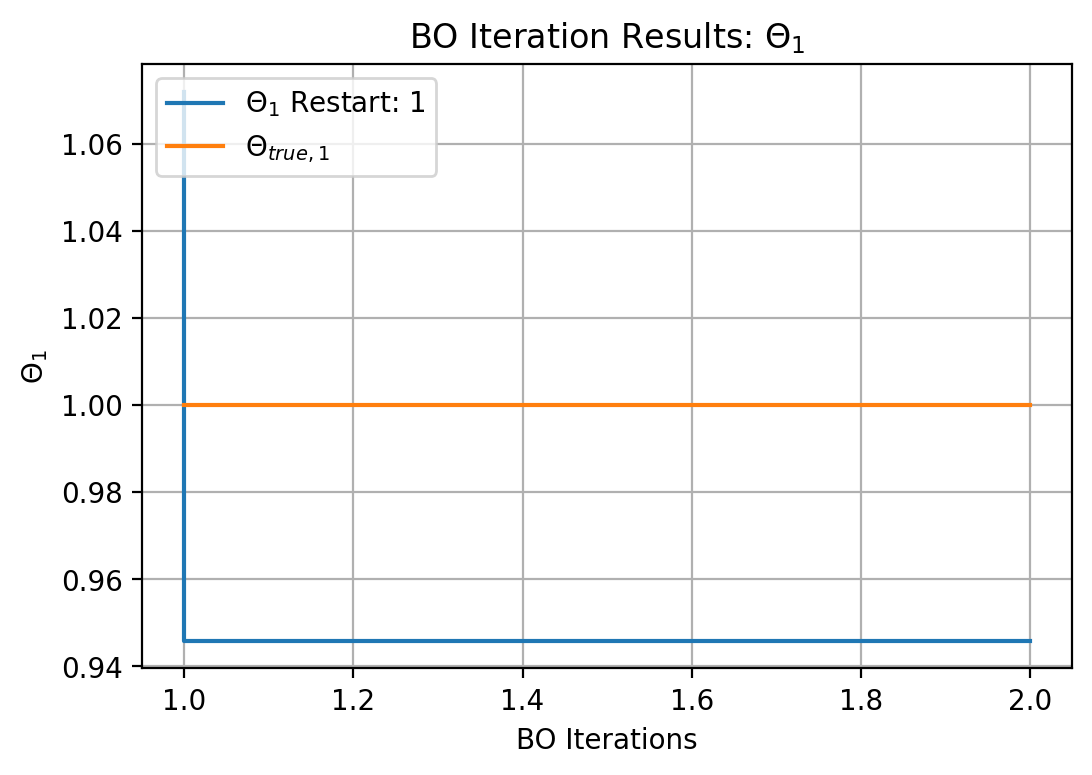

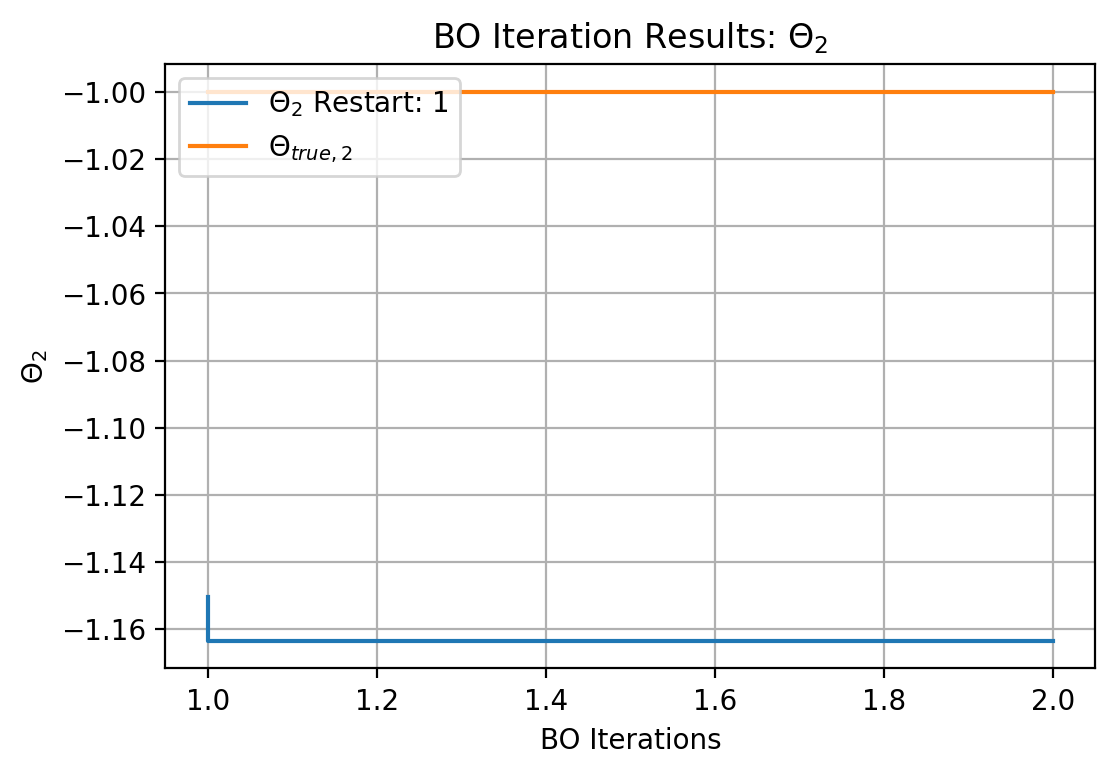

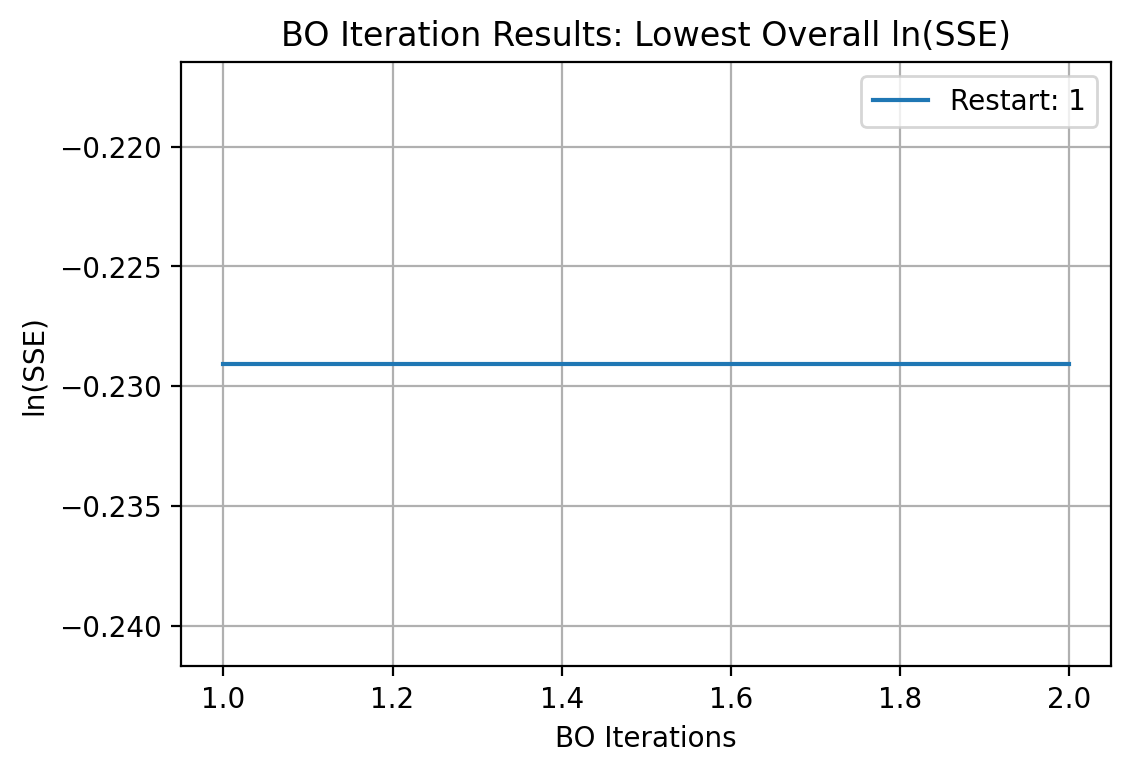

The GP predicts the lowest SSE of 7.953e-01 occurs at θ = [ 1.07189824 -1.15032974] during restart 1 at BO iteration 1
 

Lengthscale Set As: 0.5
Explore Bias: 1.0
Restart Number:  1


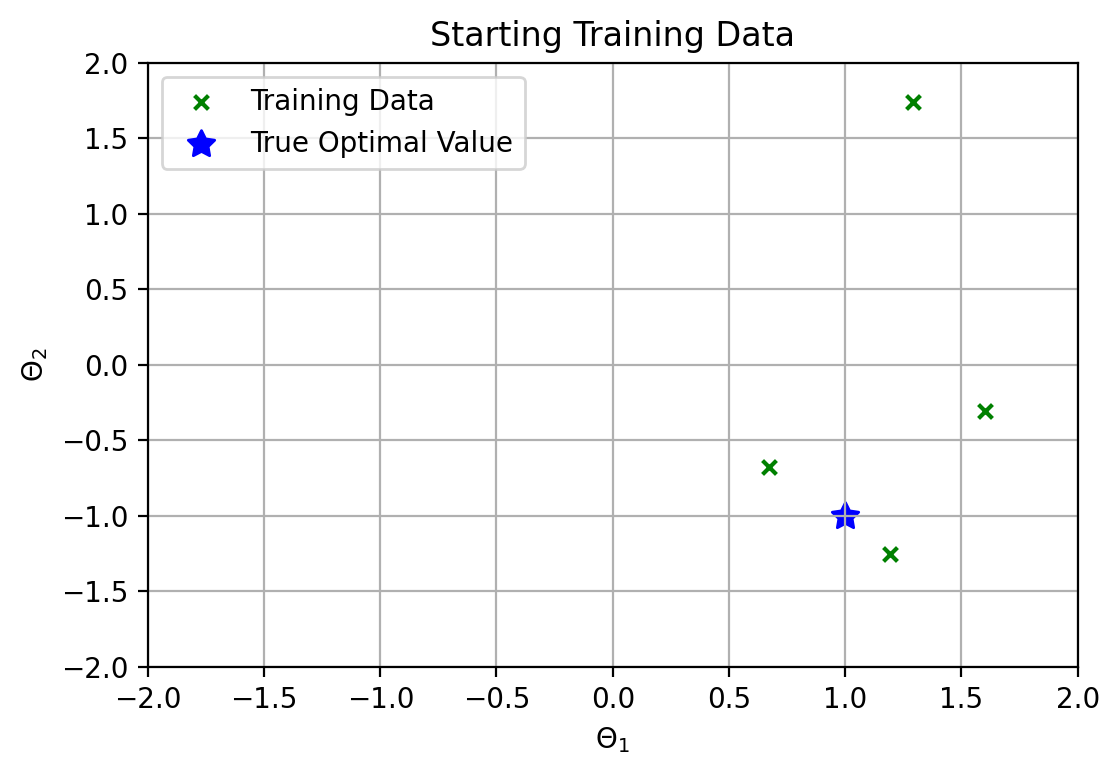

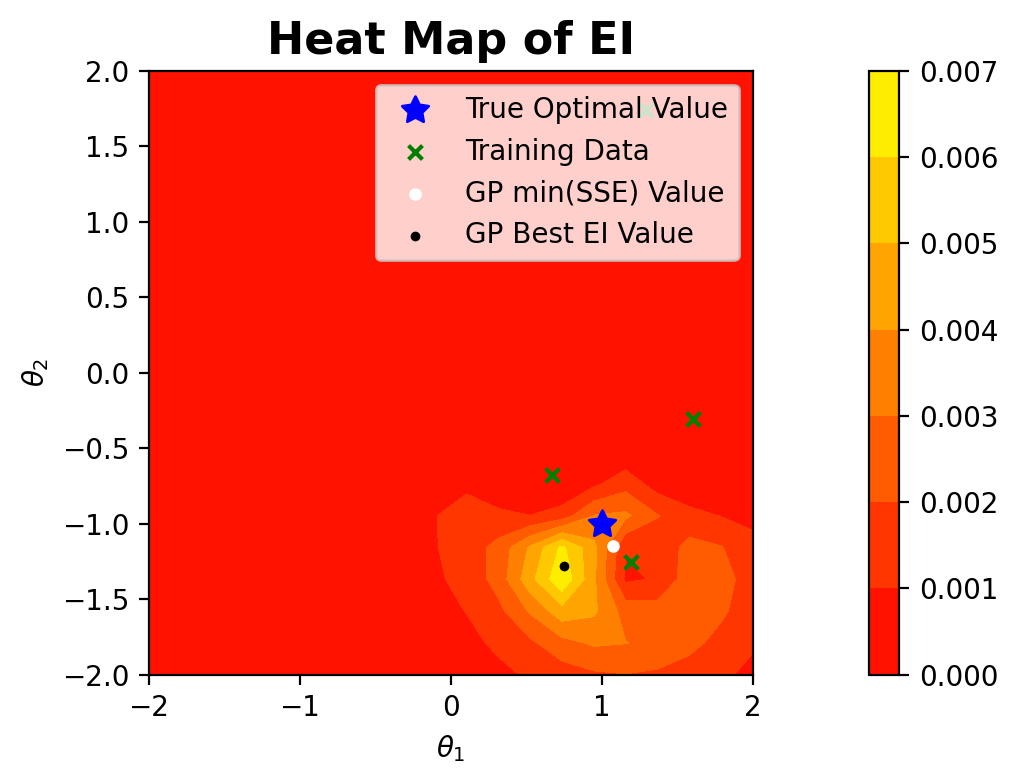

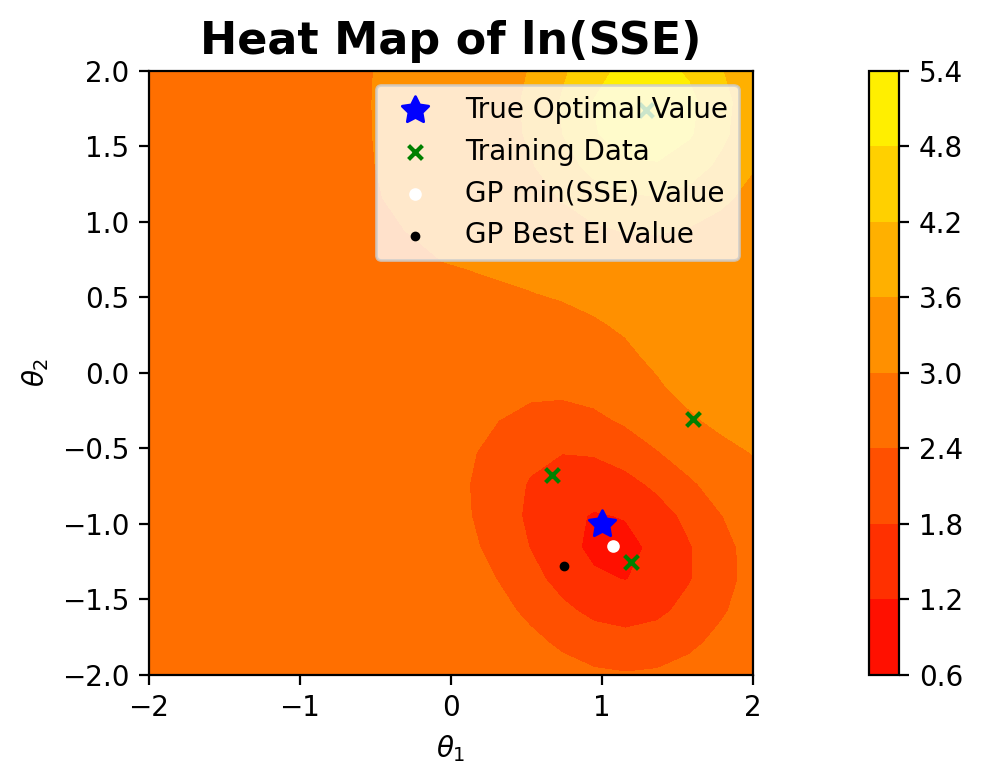

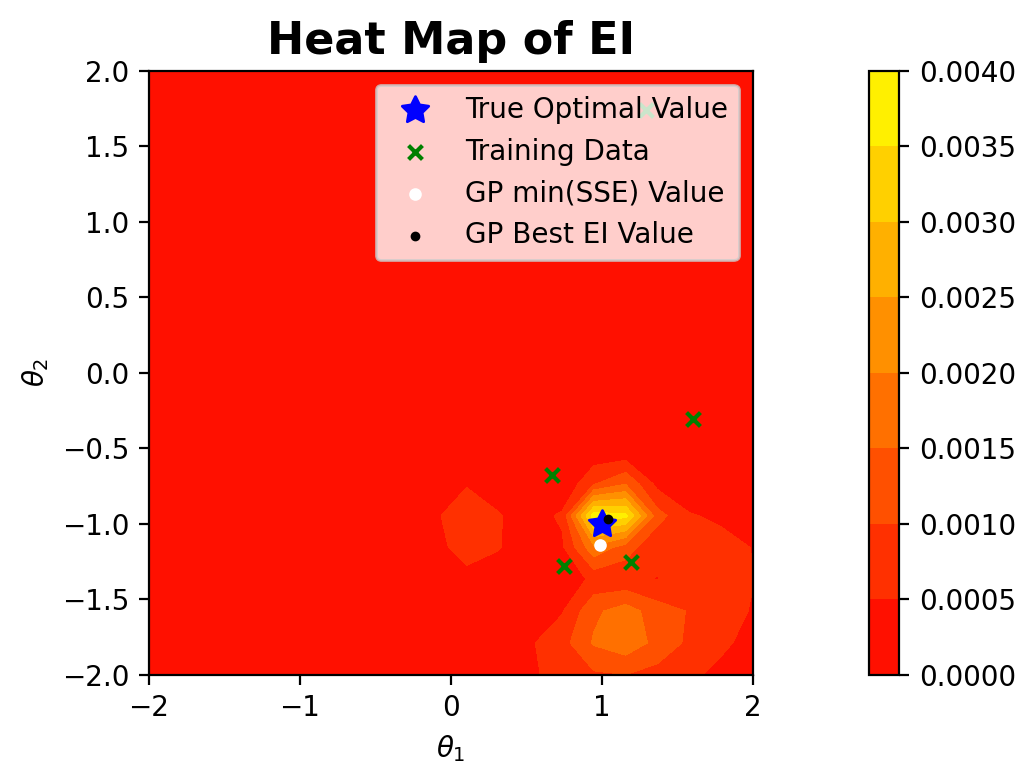

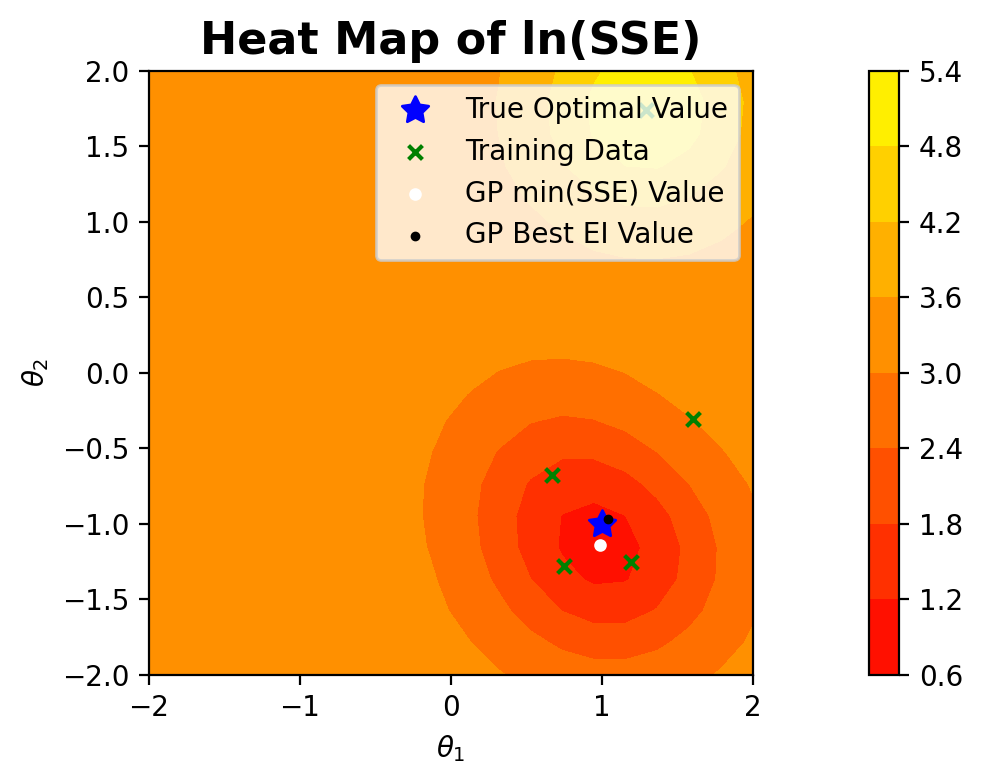

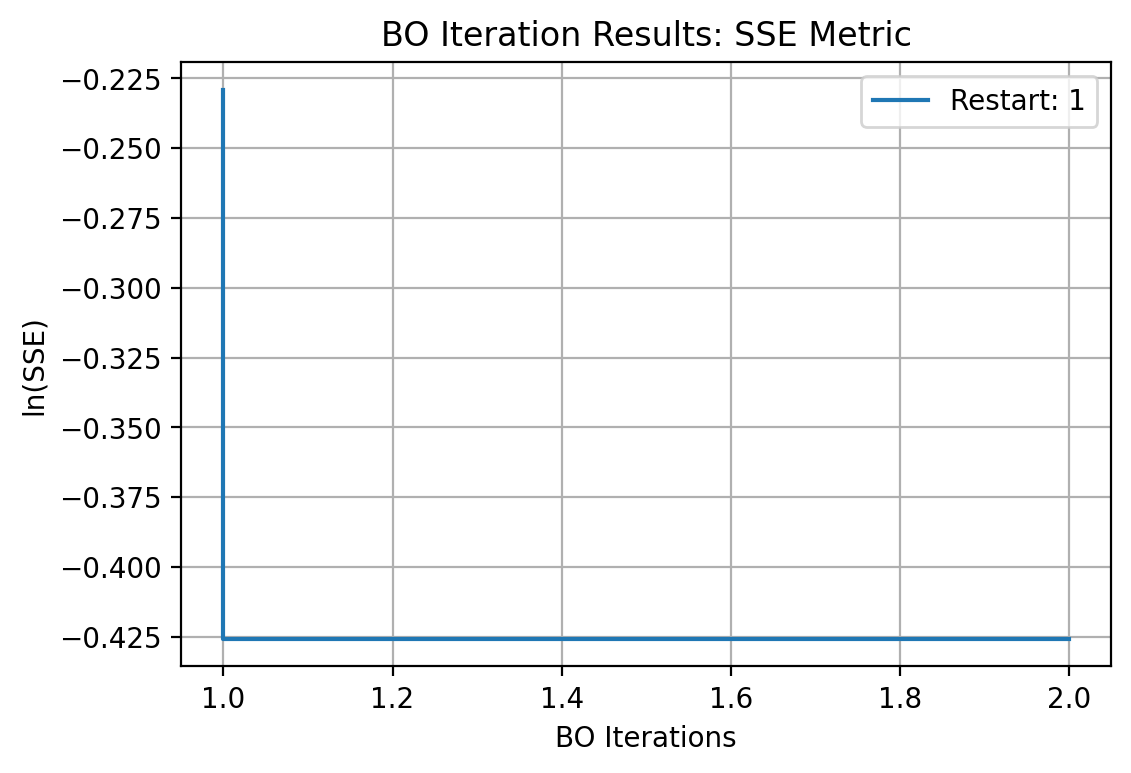

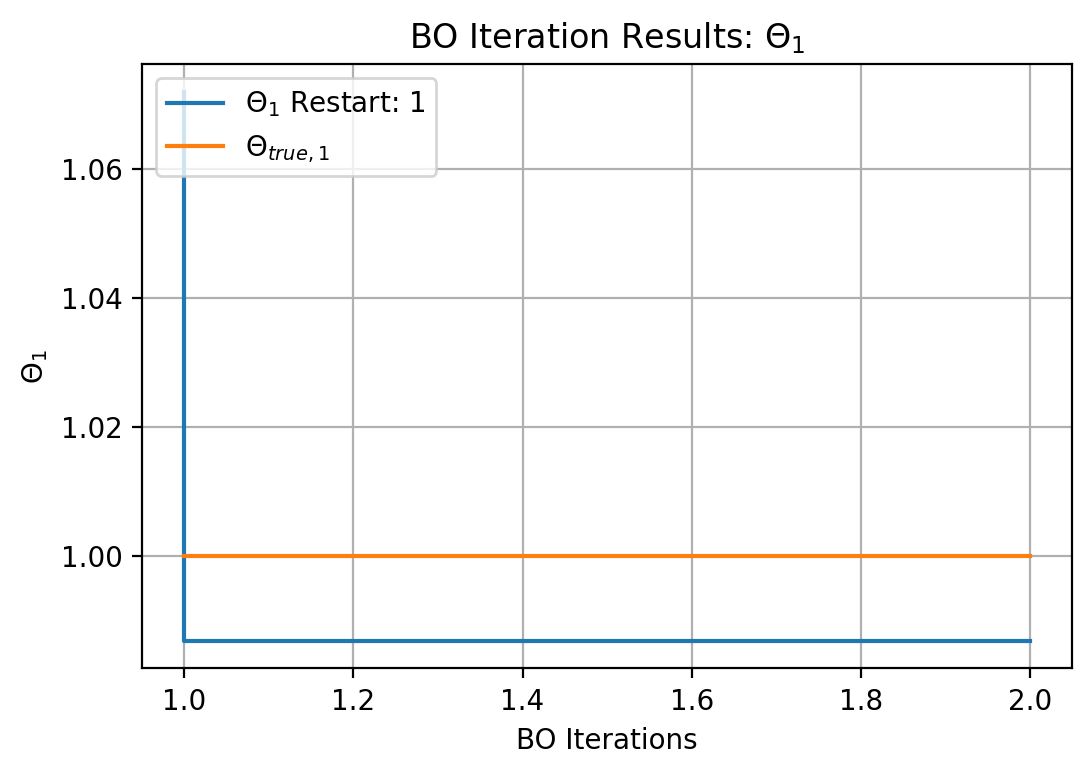

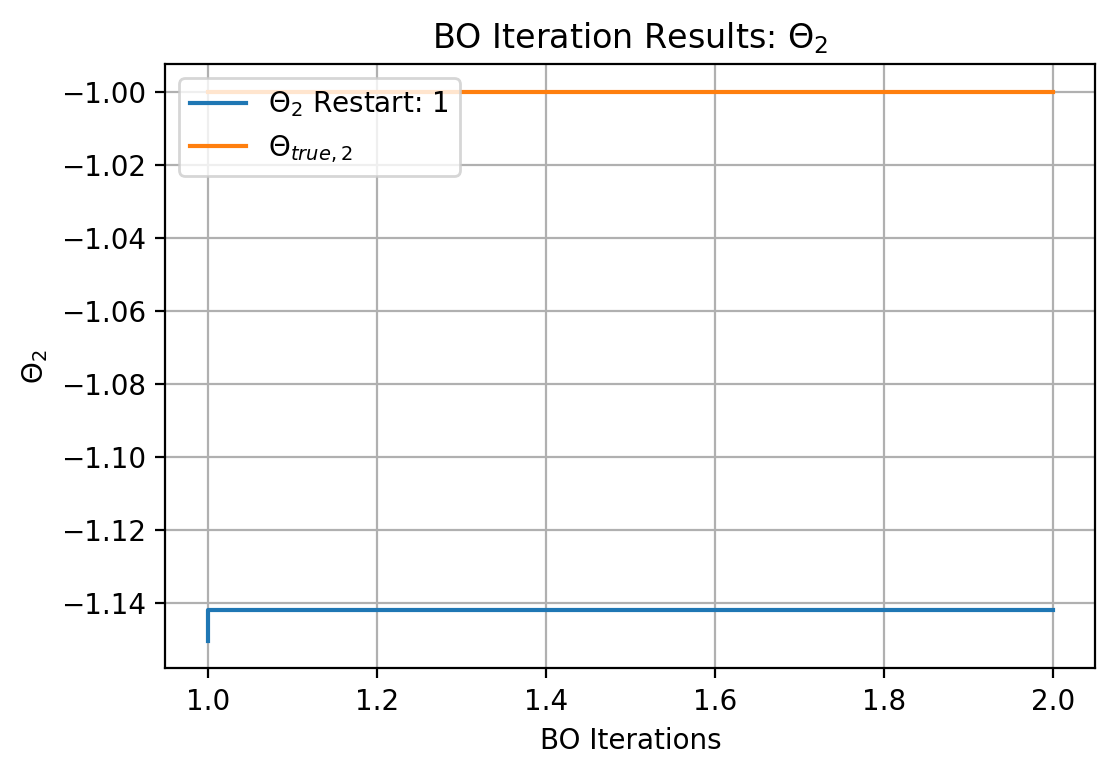

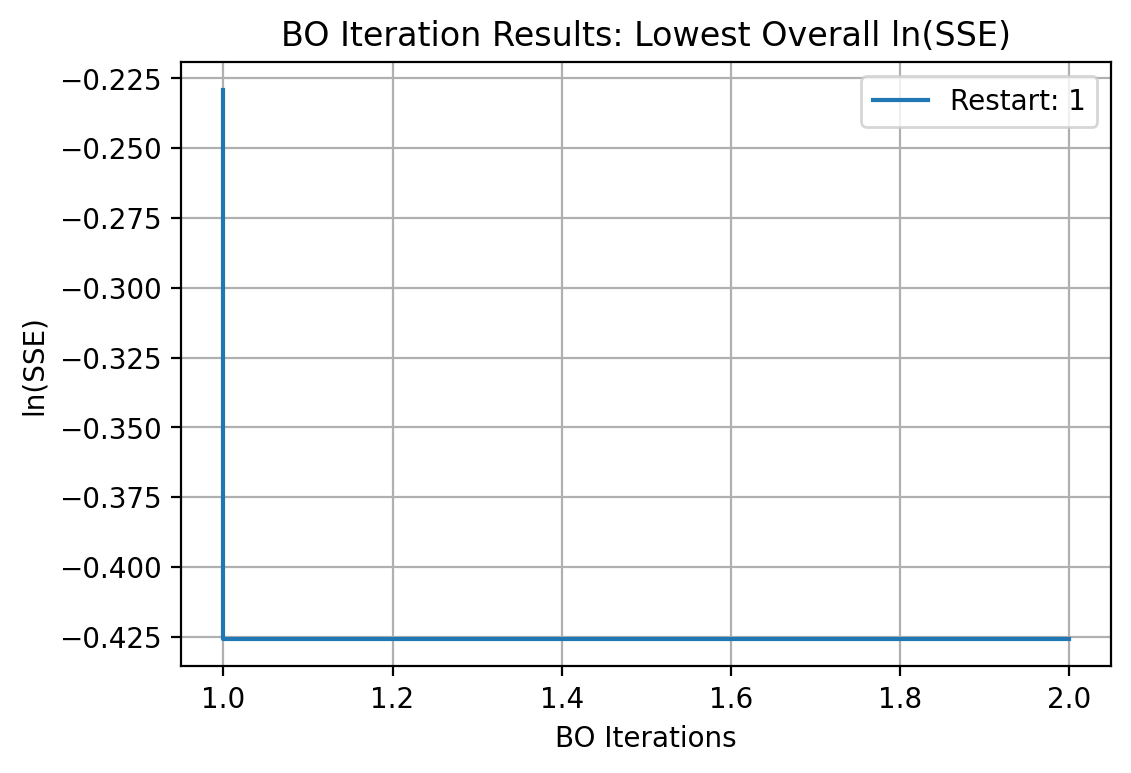

The GP predicts the lowest SSE of 6.532e-01 occurs at θ = [ 0.98686579 -1.14189528] during restart 1 at BO iteration 2
 

Lengthscale Set As: 0.5
Explore Bias: 5.0
Restart Number:  1


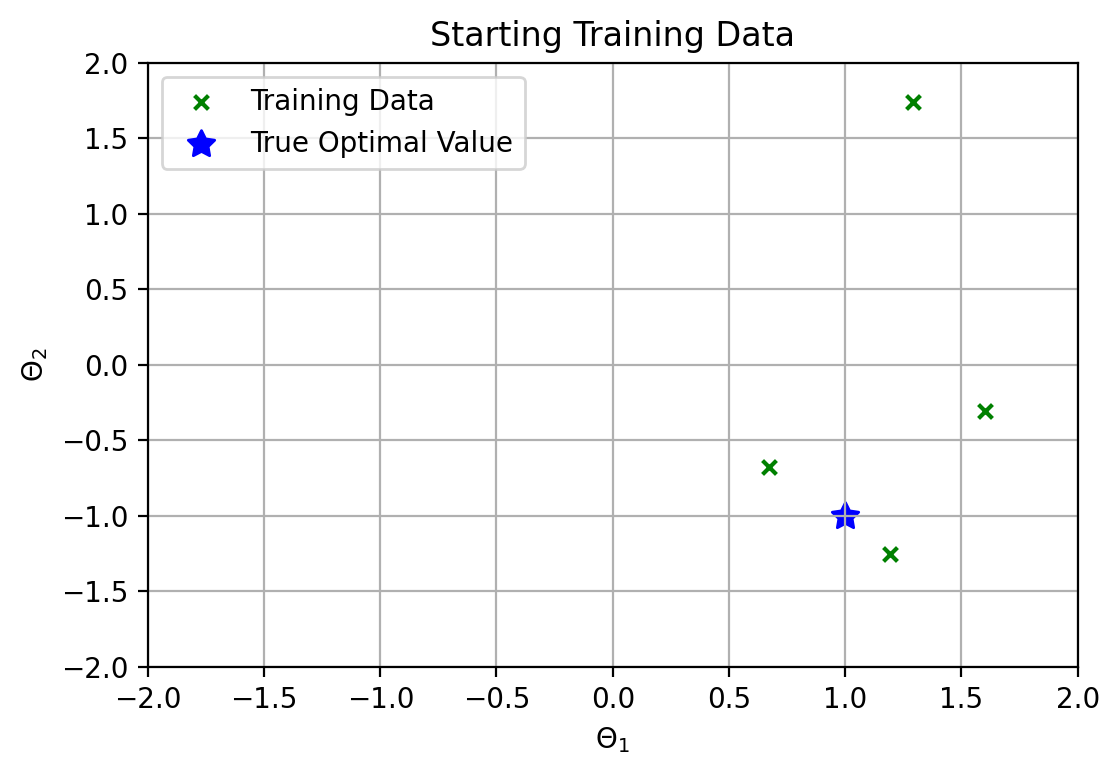

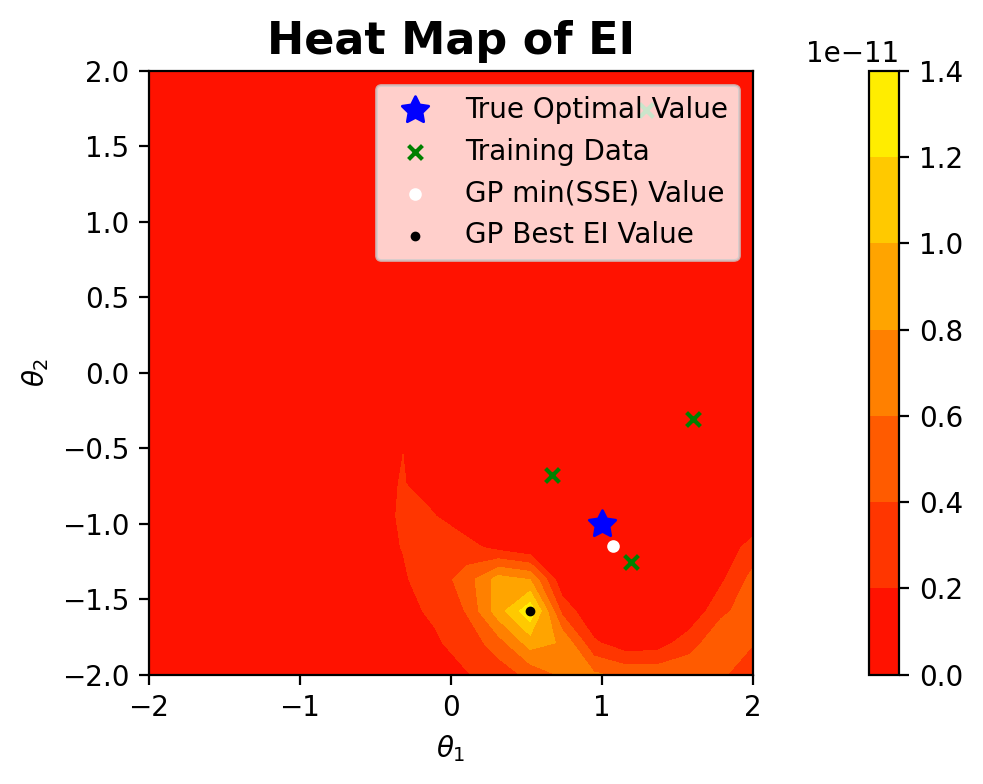

In [ ]:
import numpy as np
import pandas as pd
import torch
from bo_functions import bo_iter_w_restarts
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

#Set Parameters
Theta_True = np.array([1,-1])
BO_iters = 2
train_iter = 300
noise_std = 0.1
restarts = 1
shuffle_seed = 6
t=4
explore_bias = torch.tensor([0, 0.5, 0.75, 1, 5])
set_lengthscale = np.array([None, 0.5, 1, 5])

obj = "LN_obj"
emulator = False
verbose = False
save_fig=False
# sparse_grid = True
sparse_grid = False

#Pull Experimental data from CSV
exp_data_doc = 'Input_CSVs/Exp_Data/n=5.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays

if obj == "obj":
    all_data_doc = "Input_CSVs/Train_Data/all_2_data/t=25.csv"   
else:
    all_data_doc = "Input_CSVs/Train_Data/all_2_ln_obj_data/t=25.csv"
    
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=","))   

print("Restarts:", restarts)
print("BO Iterations:",BO_iters)
print("\n")
for i in range(len(set_lengthscale)):
    for j in range(len(explore_bias)):
        print("Lengthscale Set As:", set_lengthscale[i])
        print("Explore Bias:", str(np.round(float(explore_bias[j]),3)))
        results = bo_iter_w_restarts(BO_iters,all_data_doc,t,theta_mesh,Theta_True,train_iter,explore_bias[j], Xexp, Yexp,
                                     noise_std, obj, restarts, sparse_grid, emulator, set_lengthscale[i], verbose, 
                                     save_fig, shuffle_seed)
        print("The GP predicts the lowest SSE of", "{:.3e}".format(np.exp(results[3])), "occurs at \u03B8 =", results[2][0], 
                  "during restart", results[1], "at BO iteration", results[0])
        print(" \n")